In [1]:
#Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
import folium
from folium.plugins import FastMarkerCluster

In [5]:
import warnings

In [6]:
warnings.filterwarnings('ignore')

In [7]:
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['axes.titlesize'] = 14
plt.style.use('seaborn-deep')
sns.set_palette(palette='bright')

In [8]:
df = pd.read_excel('innercity.xlsx') 

In [9]:
df.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight  ... basement  yr_built  yr_renovated  \
0       9440.0    1     0    0.0  ...   1250.0      1966             0   
1       3101.0    1     0    0.0  ...      0.0      1948             0   
2       2415.0    2     1    4.0  ...      0.0      1966             0   
3       3721.0    2     0    0.0  ...      0.0      2009             0   
4       4590.0    1     0    0.0  ...      0.0      1924             0   

   zipcode      lat     long  living_measure15  lot_measure15 furnished  \
0    98034  47.7228 -122.183            2020.0         8660.0       0.0   
1    98118  47.5546 -122.274            1660.0         4100.0       0.0   
2    98118  47.5188 -122.256            2620.0         2433.0       0.0   
3    98002  47.3363 -122.213            2030.0         3794.0       0.0   
4    98118  47.5663 -122.285            1120.0         5100.0       0.0   

   total_area  
0       12490  
1        3771  
2        5455  
3        5461  
4        5710  

[5 rows x 23 columns]

In [10]:
print('The number of rows in the dataset is',df.shape[0])
print('The number of rows in the dataset is',df.shape[1])

The number of rows in the dataset is 21613
The number of rows in the dataset is 23


In [11]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [ ]:
df['y']

In [13]:
## OBSERVATIONS
# dayhours datatype needs to be datetime
# room bed and bath should be int64.
#There are some incorrect values in room bath and bed



In [14]:
df.isnull().sum()[df.isnull().sum()>0]

room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [15]:
# We will convert the date the property was sold to proper date time formart

date_format = "%Y%m%dT%H%M%S"

df['dayhours'] = pd.to_datetime(df['dayhours'], format=date_format).dt.date


In [16]:
df['dayhours']

0        2015-04-27
1        2015-03-17
2        2014-08-20
3        2014-10-10
4        2015-02-18
            ...    
21608    2015-03-10
21609    2014-05-21
21610    2014-09-05
21611    2015-02-06
21612    2014-12-29
Name: dayhours, Length: 21613, dtype: object

In [17]:
df.rename(columns = {'dayhours':'Sold_date'},inplace =True)

In [18]:
df['Sold_date'] = pd.to_datetime(df['Sold_date'])

In [19]:
pd.options.display.max_columns = None

In [20]:
df.head()

cid  Sold_date   price  room_bed  room_bath  living_measure  \
0  3876100940 2015-04-27  600000       4.0       1.75          3050.0   
1  3145600250 2015-03-17  190000       2.0       1.00           670.0   
2  7129303070 2014-08-20  735000       4.0       2.75          3040.0   
3  7338220280 2014-10-10  257000       3.0       2.50          1740.0   
4  7950300670 2015-02-18  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight condition  quality  ceil_measure  basement  \
0       9440.0    1     0    0.0         3      8.0        1800.0    1250.0   
1       3101.0    1     0    0.0         4      6.0         670.0       0.0   
2       2415.0    2     1    4.0         3      8.0        3040.0       0.0   
3       3721.0    2     0    0.0         3      8.0        1740.0       0.0   
4       4590.0    1     0    0.0         3      7.0        1120.0       0.0   

  yr_built  yr_renovated  zipcode      lat     long  living_measure15  \
0     1966             0    98034  47.7228 -122.183            2020.0   
1     1948             0    98118  47.5546 -122.274            1660.0   
2     1966             0    98118  47.5188 -122.256            2620.0   
3     2009             0    98002  47.3363 -122.213            2030.0   
4     1924             0    98118  47.5663 -122.285            1120.0   

   lot_measure15  furnished total_area  
0         8660.0        0.0      12490  
1         4100.0        0.0       3771  
2         2433.0        0.0       5455  
3         3794.0        0.0       5461  
4         5100.0        0.0       5710

In [21]:
num_1 = df.select_dtypes(['int64','float64','category'])

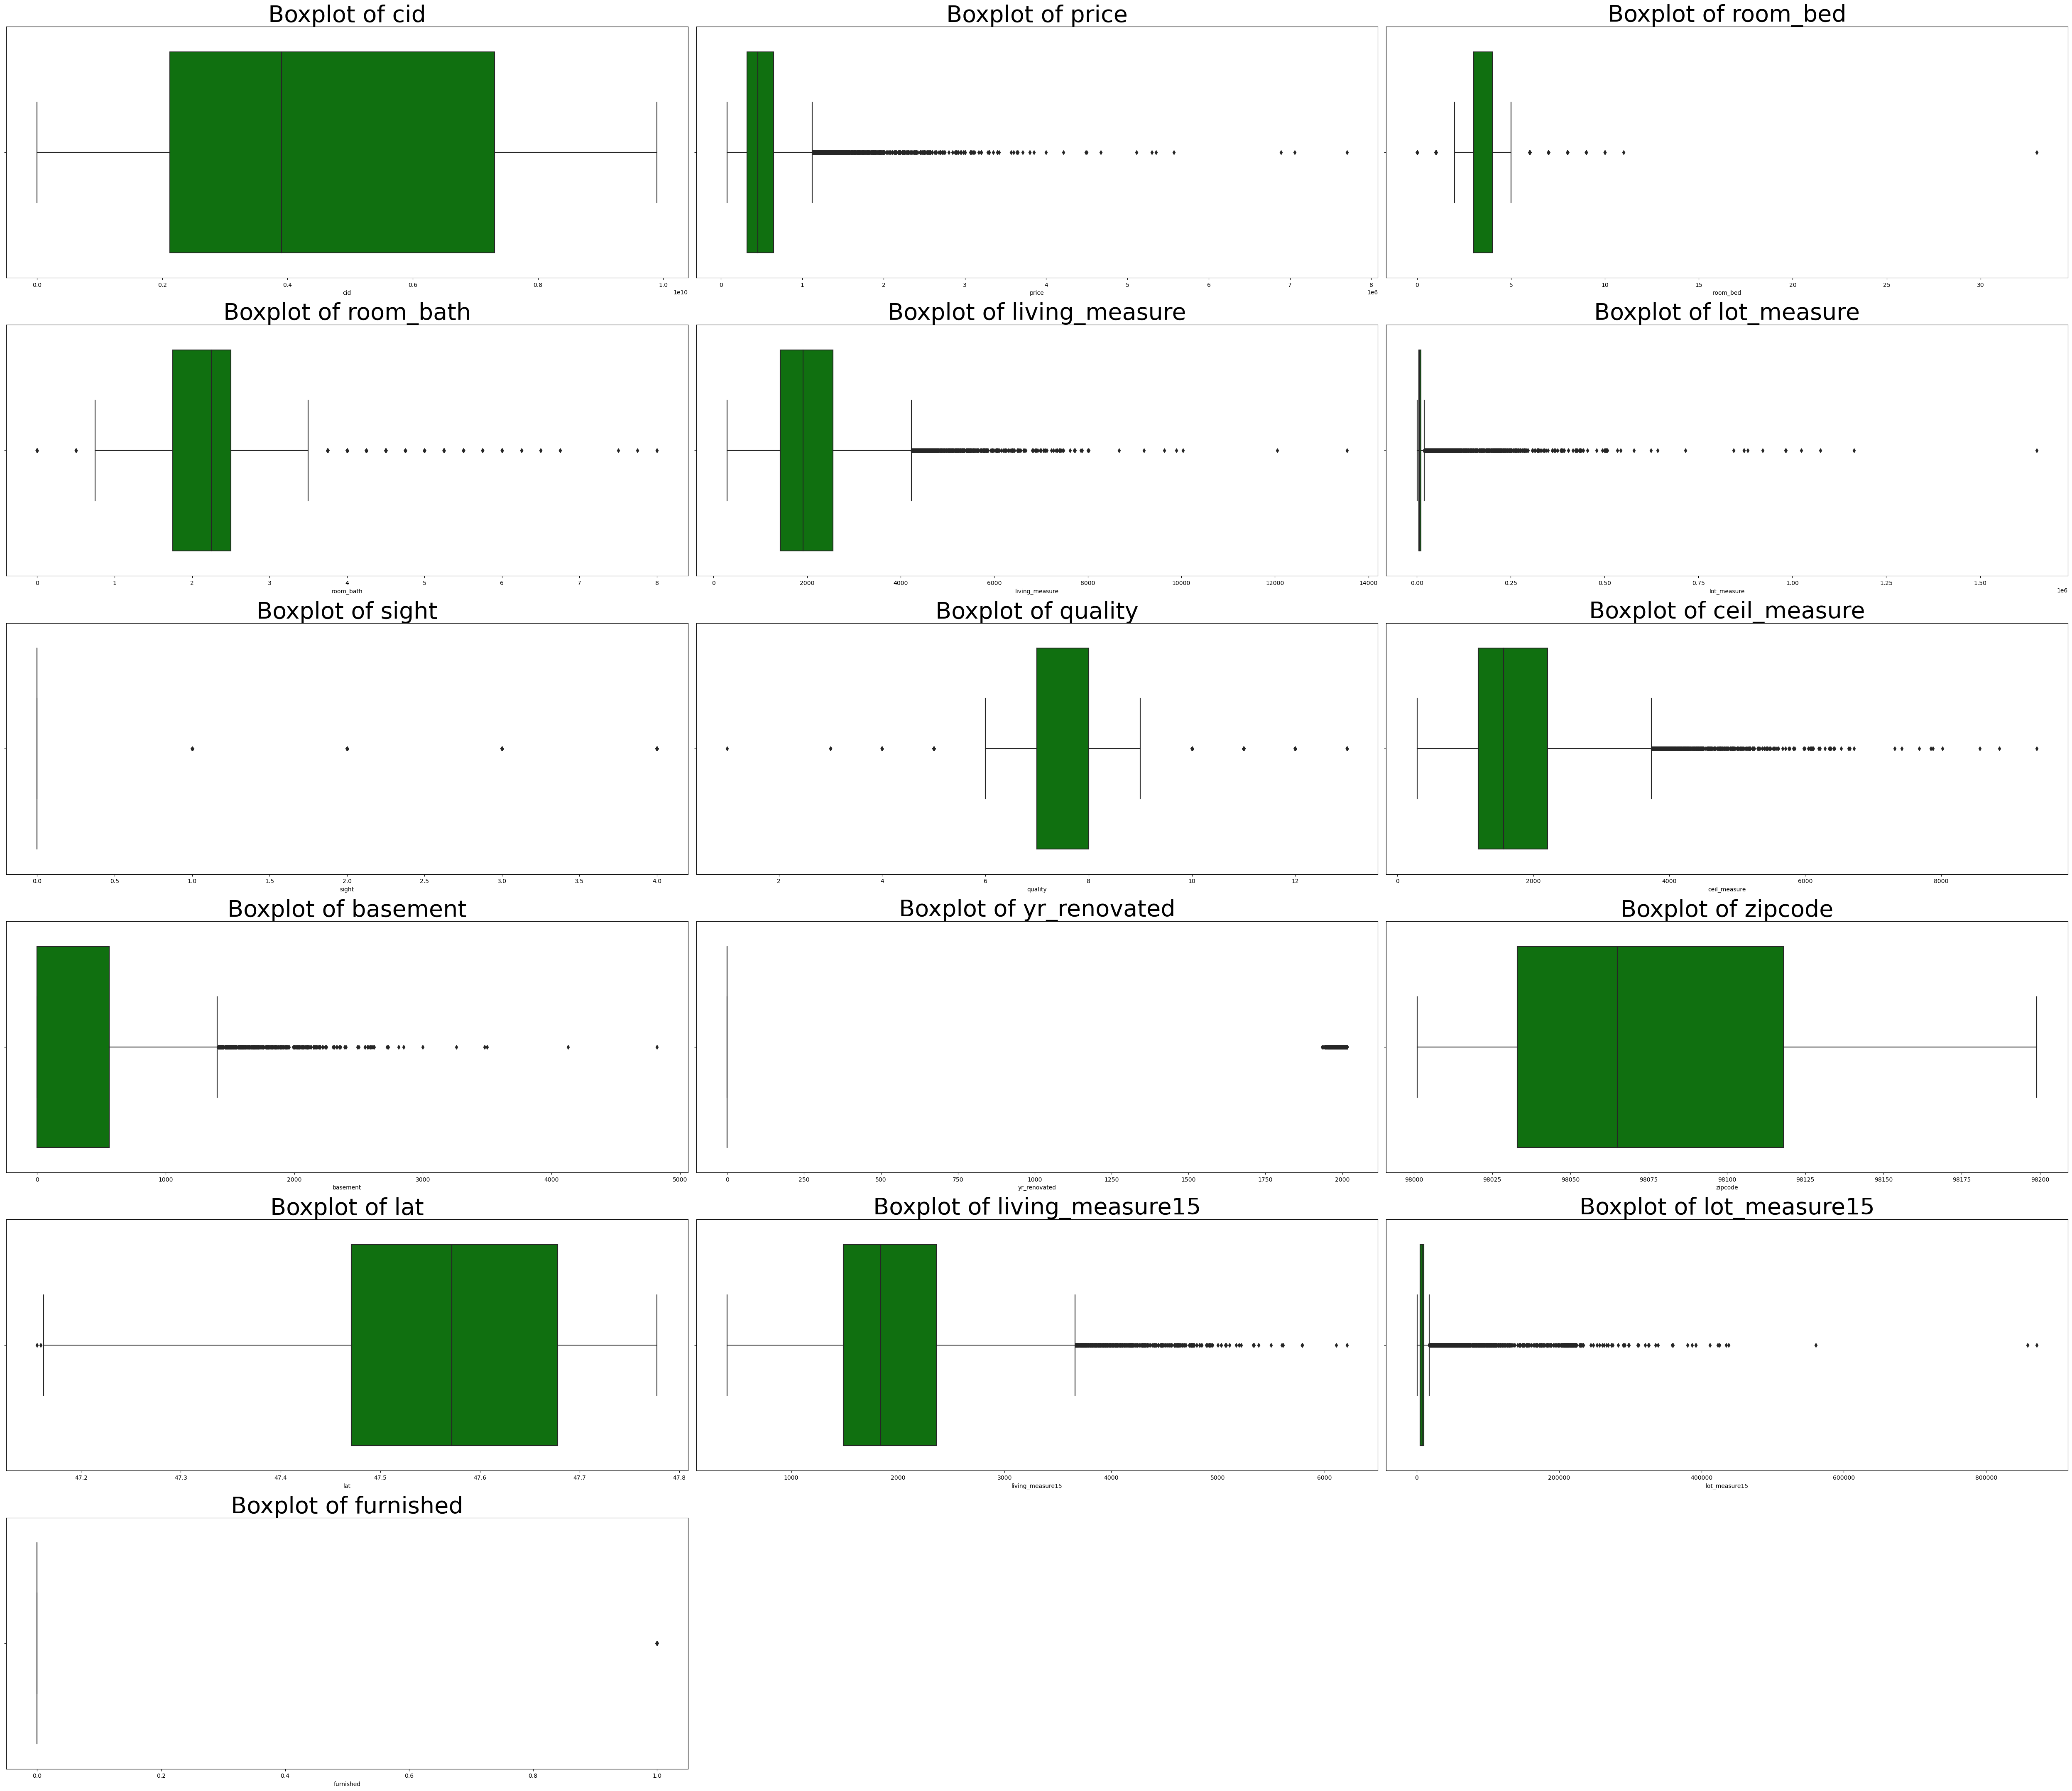

In [22]:
plt.figure(figsize=(50, 50))
feature_list_1 = num_1.columns

for i in range(len(feature_list_1)):
    plt.subplot(7, 3, i + 1)
    sns.boxplot(x=num_1[feature_list_1[i]], data=df,color='green')
    plt.title('Boxplot of {}'.format(feature_list_1[i]), fontsize=40)  # Increase the title font size
    plt.tight_layout()

plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cid               21613 non-null  int64         
 1   Sold_date         21613 non-null  datetime64[ns]
 2   price             21613 non-null  int64         
 3   room_bed          21505 non-null  float64       
 4   room_bath         21505 non-null  float64       
 5   living_measure    21596 non-null  float64       
 6   lot_measure       21571 non-null  float64       
 7   ceil              21571 non-null  object        
 8   coast             21612 non-null  object        
 9   sight             21556 non-null  float64       
 10  condition         21556 non-null  object        
 11  quality           21612 non-null  float64       
 12  ceil_measure      21612 non-null  float64       
 13  basement          21612 non-null  float64       
 14  yr_built          2161

In [24]:
df['room_bed'].value_counts()

3.0     9767
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64

In [25]:
df['room_bath'].value_counts()

2.50    5358
1.00    3829
1.75    3031
2.25    2039
2.00    1917
1.50    1439
2.75    1178
3.00     750
3.50     726
3.25     588
3.75     155
4.00     135
4.50     100
4.25      78
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.75       2
6.50       2
6.25       2
7.50       1
7.75       1
Name: room_bath, dtype: int64

In [26]:
df['long'].value_counts()

-122.290    116
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-122.474      1
-121.711      1
-121.845      1
-121.737      1
-121.947      1
Name: long, Length: 753, dtype: int64

In [27]:
monthly_data = df.groupby(df['Sold_date'].dt.to_period('M'), as_index=False)['price'].mean()

In [28]:
monthly_data['Sold_month'] = df['Sold_date'].dt.to_period('M')

In [29]:
df['price'].sort_values(ascending=False)

1068     7700000
10718    7060000
10639    6890000
12794    5570000
1031     5350000
          ...   
11003      82000
13068      81000
10847      80000
20344      78000
17946      75000
Name: price, Length: 21613, dtype: int64

In [30]:
df_obj = df.select_dtypes('object')

In [31]:
df_obj.columns

Index(['ceil', 'coast', 'condition', 'yr_built', 'long', 'total_area'], dtype='object')

In [32]:
columns_with_dollar_sign = []

for column in df_obj.columns:
    if any('$' in str(value) for value in df_obj[column]):
        columns_with_dollar_sign.append(column)

print(columns_with_dollar_sign)

['ceil', 'coast', 'condition', 'yr_built', 'long', 'total_area']


In [33]:
# These columns have $ sign in the rows

In [34]:
df['condition'].value_counts()

3    13978
4     5655
5     1694
2      171
1       30
$       28
Name: condition, dtype: int64

In [35]:
df_c = df.copy()

In [36]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

795000620     3
5101405604    2
9809000020    2
7853420110    2
6021500970    2
             ..
7871500485    1
2022069200    1
9808630120    1
7302000210    1
8805900430    1
Name: cid, Length: 21436, dtype: int64


2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2015-05-15      1
2015-01-10      1
2014-08-03      1
2015-01-31      1
2014-08-30      1
Name: Sold_date, Length: 372, dtype: int64


450000    172
350000    172
550000    159
500000    152
425000    150
         ... 
919000      1
364988      1
362764      1
849900      1
685530      1
Name: price, Length: 3625, dtype: int64


3.0     9767
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64


2.50    5358
1.00    3829
1.75    3031
2.25    2039
2.00    1917
1.50    1439
2.75    1178
3.00     750
3.50     726
3.25     588
3.75     155
4

In [37]:
df.columns

Index(['cid', 'Sold_date', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [38]:
columns_with_dollar_sign

['ceil', 'coast', 'condition', 'yr_built', 'long', 'total_area']

In [39]:
df[df['condition']=='$']

cid  Sold_date    price  room_bed  room_bath  living_measure  \
2099   4046601010 2014-10-23   399950       NaN        NaN          2450.0   
3375   8901000585 2015-04-01   525000       NaN        NaN          1600.0   
5329   2771102158 2014-10-21   395000       NaN        NaN          1450.0   
5407   4046601420 2014-12-30   340000       NaN        NaN          1570.0   
5520   3629860160 2014-10-28   825000       NaN        NaN          3760.0   
5953    629000605 2015-02-27  1400000       NaN        NaN          2910.0   
7831   6021501420 2014-08-25   571000       NaN        NaN          1350.0   
8146    452001890 2015-04-15   730000       NaN        NaN          1650.0   
8406   3329510850 2015-03-06   286950       NaN        NaN          2080.0   
10783  2624049165 2014-05-13   575000       NaN        NaN          1580.0   
13244  7203101590 2015-01-08   305000       NaN        NaN          1290.0   
13604  1231000520 2014-11-18   607010       NaN        NaN          2180.0   
13654  4136890560 2015-04-30   346300       NaN        NaN          2590.0   
13791  2113700790 2015-03-12   435010       NaN        NaN          1270.0   
13922  7202270830 2014-06-25   608000       NaN        NaN          2690.0   
14172  7683800200 2015-04-02   275000       NaN        NaN          1270.0   
14478  8651600110 2015-04-21   939000       NaN        NaN          2240.0   
14870  3426049031 2014-06-17   870000       NaN        NaN          3010.0   
15454  7129300595 2015-05-06   158000       NaN        NaN          1090.0   
15664  8594400370 2015-02-05   299900       NaN        NaN          1560.0   
15888  8074400150 2015-04-01   261500       NaN        NaN          1410.0   
18019  9828701745 2015-01-23   480000       NaN        NaN           710.0   
18607  2769602135 2014-08-13   435000       NaN        NaN          1380.0   
18784  1446401290 2014-10-30   214950       NaN        NaN          1400.0   
19064  2558600100 2014-08-27   500000       NaN        NaN          2100.0   
20901   985001015 2014-06-04   135000       NaN        NaN           790.0   
21052  7852120120 2014-06-20   725000       NaN        NaN          3690.0   
21109  8682291840 2015-03-31   408000       NaN        NaN          1200.0   

       lot_measure ceil coast  sight condition  quality  ceil_measure  \
2099       15001.0    1     0    0.0         $      7.0        1980.0   
3375        7400.0    1     0    0.0         $      7.0        1210.0   
5329        1263.0    2     0    0.0         $      8.0        1160.0   
5407       14992.0    1     0    0.0         $      8.0        1570.0   
5520        5260.0    2     0    0.0         $      9.0        3230.0   
5953       10044.0    2     0    0.0         $     10.0        2910.0   
7831        4000.0  1.5     0    0.0         $      8.0        1350.0   
8146        5000.0  1.5     0    0.0         $      8.0        1650.0   
8406        9846.0    1     0    0.0         $      7.0        1240.0   
10783      11750.0    1     0    0.0         $      7.0        1180.0   
13244       3383.0    2     0    0.0         $      7.0        1290.0   
13604       4000.0    2     0    0.0         $      8.0        1700.0   
13654      11018.0    2     0    0.0         $      8.0        2590.0   
13791       4000.0    1     0    0.0         $      7.0        1120.0   
13922       4736.0    2     0    0.0         $      7.0        2690.0   
14172      32175.0    1     0    0.0         $      7.0        1270.0   
14478       9684.0    2     0    0.0         $      9.0        2240.0   
14870       4887.0    2     0    3.0         $     10.0        1940.0   
15454       6090.0    1     0    0.0         $      7.0         940.0   
15664      35026.0    1     0    0.0         $      7.0        1290.0   
15888       8174.0    1     0    0.0         $      8.0        1410.0   
18019       4800.0    1     0    0.0         $      6.0         710.0   
18607       2500.0    1     0    0.0         $      7.0         750.0   

In [40]:
rows_to_drop = df_c[df_c['condition'] == '$'].index
df_c = df_c.drop(rows_to_drop)

In [41]:
# Now all the $ signs are dropped from data set along with the rows

In [42]:
df_ceil = df[df['ceil']=='$']

In [43]:
df_ceil

cid  Sold_date    price  room_bed  room_bath  living_measure  \
193    1023059313 2015-02-05   390000       3.0       2.50          1910.0   
1241   8838900032 2014-05-18   732000       3.0       2.00          1940.0   
1927   4217400590 2014-11-18   589000       3.0       1.50          1390.0   
3107    125069038 2014-11-25  2140000       4.0       3.75          5150.0   
3534   7636800041 2014-06-25   995000       3.0       4.50          4380.0   
3569   2621760480 2014-10-14   367000       4.0       2.50          2350.0   
3791   7893804845 2015-02-23   340000       2.0       1.00          1700.0   
4115   1250202145 2014-08-28  1070000       2.0       2.25          3900.0   
5467   1326049130 2014-07-02   605000       4.0       2.25          2940.0   
5636   3797001702 2014-12-16  1070000       5.0       3.50          2920.0   
6604   9547202265 2015-04-27   990000       3.0       3.25          2460.0   
6844   7811000020 2014-11-13   490000       3.0       1.75          1660.0   
10282  1788700070 2014-06-27   170000       2.0       1.00           810.0   
10812  5230300210 2014-12-10   299000       3.0       1.00          1040.0   
10911  9406530090 2014-10-20   337000       4.0       2.50          2470.0   
10932  3905100070 2015-02-03   467000       3.0       2.50          1530.0   
10947  2738600080 2014-08-15   495000       4.0       3.00          2740.0   
11839  3812400854 2014-10-28   352800       4.0       2.00          2080.0   
12853   666000143 2014-12-29   785000       3.0       3.00          1950.0   
14121  8691410730 2015-02-20   708000       4.0       2.50          3090.0   
14824  2130400150 2014-09-25   340000       3.0       1.75          1210.0   
14835  3123039089 2014-07-15   252000       2.0       1.00           940.0   
15308  3821700038 2014-10-01   305000       3.0       3.00          1290.0   
15363  1220000371 2014-12-31   327500       3.0       2.50          1820.0   
15657   122069107 2014-12-04   427500       3.0       1.50          1900.0   
16097  2599001200 2014-11-03   305000       5.0       2.25          2660.0   
16154  9253900408 2015-04-08  1400000       3.0       2.75          3130.0   
16279  1862400517 2014-08-13   350000       3.0       2.00          1320.0   
18518  2922701420 2014-11-18   490000       4.0       2.25          2020.0   
19116  7237300330 2015-03-12   268000       5.0       2.50          2400.0   

       lot_measure ceil coast  sight condition  quality  ceil_measure  \
193         4755.0    $     $    0.0         3      8.0        1910.0   
1241       55756.0    $     $    0.0         5      9.0        1940.0   
1927        5040.0    $     $    0.0         3      7.0        1090.0   
3107      453895.0    $     $    3.0         3     11.0        4360.0   
3534       47044.0    $     $    3.0         3      9.0        3720.0   
3569        8182.0    $     $    0.0         3      8.0        2350.0   
3791        6718.0    $     $    2.0         3      7.0        1230.0   
4115       14864.0    $     $    3.0         3      8.0        1950.0   
5467       48788.0    $     $    0.0         5      7.0        1520.0   
5636        3000.0    $     $    0.0         3      9.0        2260.0   
6604        4182.0    $     $    0.0         5      8.0        2100.0   
6844        8208.0    $     $    0.0         4      8.0        1660.0   
10282       8424.0    $     $    0.0         4      6.0         810.0   
10812       9514.0    $     $    0.0         4      7.0        1040.0   
10911       5100.0    $     $    0.0         3      8.0        2470.0   
10932       3984.0    $     $    0.0         3      8.0        1530.0   
10947       2811.0    $     $    0.0         3      8.0        2240.0   
11839       6360.0    $     $    0.0         3      7.0        1330.0   
12853       1983.0    $     $    0.0         3      9.0        1610.0   
14121       5600.0    $     $    0.0         3      9.0        3090.0   
14824       9635.0    $     $    0.0         4      7.0       

In [44]:
df_ceil.describe(include='all').T

count unique                  top  freq      first  \
cid               30.0    NaN                  NaN   NaN        NaT   
Sold_date           30     29  2014-11-18 00:00:00     2 2014-05-18   
price             30.0    NaN                  NaN   NaN        NaT   
room_bed          30.0    NaN                  NaN   NaN        NaT   
room_bath         30.0    NaN                  NaN   NaN        NaT   
living_measure    30.0    NaN                  NaN   NaN        NaT   
lot_measure       30.0    NaN                  NaN   NaN        NaT   
ceil                30      1                    $    30        NaT   
coast               30      1                    $    30        NaT   
sight             30.0    NaN                  NaN   NaN        NaT   
condition         30.0    3.0                  3.0  20.0        NaT   
quality           30.0    NaN                  NaN   NaN        NaT   
ceil_measure      30.0    NaN                  NaN   NaN        NaT   
basement          30.0    NaN                  NaN   NaN        NaT   
yr_built          30.0   22.0               1997.0   3.0        NaT   
yr_renovated      30.0    NaN                  NaN   NaN        NaT   
zipcode           30.0    NaN                  NaN   NaN        NaT   
lat               30.0    NaN                  NaN   NaN        NaT   
long              30.0   29.0             -122.346   2.0        NaT   
living_measure15  30.0    NaN                  NaN   NaN        NaT   
lot_measure15     30.0    NaN                  NaN   NaN        NaT   
furnished         30.0    NaN                  NaN   NaN        NaT   
total_area        30.0   30.0               6665.0   1.0        NaT   

                       last               mean                std  \
cid                     NaT  4220660149.266667  3104211109.750462   
Sold_date        2015-04-27                NaN                NaN   
price                   NaT      595226.666667      418884.882494   
room_bed                NaT           3.333333           0.844182   
room_bath               NaT              2.325           0.833434   
living_measure          NaT        2236.666667        1005.564975   
lot_measure             NaT            27140.3       82019.175246   
ceil                    NaT                NaN                NaN   
coast                   NaT                NaN                NaN   
sight                   NaT                0.5           1.167077   
condition               NaT                NaN                NaN   
quality                 NaT           7.733333           1.048261   
ceil_measure            NaT        1876.666667         806.098879   
basement                NaT              360.0         504.702029   
yr_built                NaT                NaN                NaN   
yr_renovated            NaT         132.466667         504.118673   
zipcode                 NaT       98074.566667          53.518082   
lat                     NaT          47.555453           0.138104   
long                    NaT                NaN                NaN   
living_measure15        NaT        2010.333333         556.897089   
lot_measure15           NaT       18678.966667       41827.175709   
furnished               NaT                0.2           0.406838   
total_area              NaT                NaN                NaN   

                          min            25%           50%            75%  \
cid               122069107.0  1807125181.75  3460020395.5  7536925113.25   
Sold_date                 NaN            NaN           NaN            NaN   
price                170000.0       337750.0      447250.0       726000.0   
room_bed                  2.0            3.0           3.0            4.0   
room_bath                 1.0         1.8125         2.375         2.6875   
living_measure          810.0         1562.5        1985.0         2720.0   
lot_measure            1112.0         4277.5        6539.0       13556.75   
ceil                      NaN          

In [45]:
df_c.describe(include='all').T

count unique                  top     freq      first  \
cid               21585.0    NaN                  NaN      NaN        NaT   
Sold_date           21585    372  2014-06-23 00:00:00      142 2014-05-02   
price             21585.0    NaN                  NaN      NaN        NaT   
room_bed          21505.0    NaN                  NaN      NaN        NaT   
room_bath         21505.0    NaN                  NaN      NaN        NaT   
living_measure    21568.0    NaN                  NaN      NaN        NaT   
lot_measure       21543.0    NaN                  NaN      NaN        NaT   
ceil              21543.0    7.0                  1.0  10631.0        NaT   
coast             21584.0    3.0                  0.0  21393.0        NaT   
sight             21528.0    NaN                  NaN      NaN        NaT   
condition         21528.0    5.0                  3.0  13978.0        NaT   
quality           21584.0    NaN                  NaN      NaN        NaT   
ceil_measure      21584.0    NaN                  NaN      NaN        NaT   
basement          21584.0    NaN                  NaN      NaN        NaT   
yr_built          21584.0  117.0               2014.0    559.0        NaT   
yr_renovated      21585.0    NaN                  NaN      NaN        NaT   
zipcode           21585.0    NaN                  NaN      NaN        NaT   
lat               21585.0    NaN                  NaN      NaN        NaT   
long              21585.0  753.0              -122.29    116.0        NaT   
living_measure15  21447.0    NaN                  NaN      NaN        NaT   
lot_measure15     21556.0    NaN                  NaN      NaN        NaT   
furnished         21556.0    NaN                  NaN      NaN        NaT   
total_area          21556  11140                    $       39        NaT   

                       last               mean                std        min  \
cid                     NaT  4579941455.093862  2876479779.320665  1000102.0   
Sold_date        2015-05-27                NaN                NaN        NaN   
price                   NaT      540231.940144      367469.692149    75000.0   
room_bed                NaT           3.371355           0.930289        0.0   
room_bath               NaT           2.115171           0.770248        0.0   
living_measure          NaT        2080.137379          918.62458      290.0   
lot_measure             NaT       15112.143991       41449.069404      520.0   
ceil                    NaT                NaN                NaN        NaN   
coast                   NaT                NaN                NaN        NaN   
sight                   NaT           0.234532           0.766659        0.0   
condition               NaT                NaN                NaN        NaN   
quality                 NaT           7.656875           1.175567        1.0   
ceil_measure            NaT         1788.53308          828.18218      290.0   
basement                NaT         291.632459         442.736402        0.0   
yr_built                NaT                NaN                NaN        NaN   
yr_renovated            NaT          84.419273         401.717944        0.0   
zipcode                 NaT       98077.935233          53.505832    98001.0   
lat                     NaT          47.560038           0.138571    47.1559   
long                    NaT                NaN                NaN        NaN   
living_measure15        NaT        1987.065557         685.519629      399.0   
lot_measure15           NaT       12772.435146       27303.284264      651.0   
furnished               NaT           0.196743           0.397546        0.0   
total_area              NaT                NaN                NaN        NaN   

                           25%           50%           75%           max  
cid               2123049175.0  3904930240.0  7308900100.0  9900000190.0  
Sold_date                  NaN           NaN           NaN           NaN  
price                 322

In [46]:
df_c.isnull().sum()[df_c.isnull().sum()>0]

room_bed             80
room_bath            80
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
living_measure15    138
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [47]:
missing_values=pd.DataFrame(df_c.isna().sum().reset_index())
missing_values.columns = ['Features','Missing count']
missing_values['% missing']= round(missing_values['Missing count'] / df_c.shape[0] * 100.00,2)
missing_values

Features  Missing count  % missing
0                cid              0       0.00
1          Sold_date              0       0.00
2              price              0       0.00
3           room_bed             80       0.37
4          room_bath             80       0.37
5     living_measure             17       0.08
6        lot_measure             42       0.19
7               ceil             42       0.19
8              coast              1       0.00
9              sight             57       0.26
10         condition             57       0.26
11           quality              1       0.00
12      ceil_measure              1       0.00
13          basement              1       0.00
14          yr_built              1       0.00
15      yr_renovated              0       0.00
16           zipcode              0       0.00
17               lat              0       0.00
18              long              0       0.00
19  living_measure15            138       0.64
20     lot_measure15             29       0.13
21         furnished             29       0.13
22        total_area             29       0.13

In [48]:
df_c[df_c['ceil']=='$']

cid  Sold_date    price  room_bed  room_bath  living_measure  \
193    1023059313 2015-02-05   390000       3.0       2.50          1910.0   
1241   8838900032 2014-05-18   732000       3.0       2.00          1940.0   
1927   4217400590 2014-11-18   589000       3.0       1.50          1390.0   
3107    125069038 2014-11-25  2140000       4.0       3.75          5150.0   
3534   7636800041 2014-06-25   995000       3.0       4.50          4380.0   
3569   2621760480 2014-10-14   367000       4.0       2.50          2350.0   
3791   7893804845 2015-02-23   340000       2.0       1.00          1700.0   
4115   1250202145 2014-08-28  1070000       2.0       2.25          3900.0   
5467   1326049130 2014-07-02   605000       4.0       2.25          2940.0   
5636   3797001702 2014-12-16  1070000       5.0       3.50          2920.0   
6604   9547202265 2015-04-27   990000       3.0       3.25          2460.0   
6844   7811000020 2014-11-13   490000       3.0       1.75          1660.0   
10282  1788700070 2014-06-27   170000       2.0       1.00           810.0   
10812  5230300210 2014-12-10   299000       3.0       1.00          1040.0   
10911  9406530090 2014-10-20   337000       4.0       2.50          2470.0   
10932  3905100070 2015-02-03   467000       3.0       2.50          1530.0   
10947  2738600080 2014-08-15   495000       4.0       3.00          2740.0   
11839  3812400854 2014-10-28   352800       4.0       2.00          2080.0   
12853   666000143 2014-12-29   785000       3.0       3.00          1950.0   
14121  8691410730 2015-02-20   708000       4.0       2.50          3090.0   
14824  2130400150 2014-09-25   340000       3.0       1.75          1210.0   
14835  3123039089 2014-07-15   252000       2.0       1.00           940.0   
15308  3821700038 2014-10-01   305000       3.0       3.00          1290.0   
15363  1220000371 2014-12-31   327500       3.0       2.50          1820.0   
15657   122069107 2014-12-04   427500       3.0       1.50          1900.0   
16097  2599001200 2014-11-03   305000       5.0       2.25          2660.0   
16154  9253900408 2015-04-08  1400000       3.0       2.75          3130.0   
16279  1862400517 2014-08-13   350000       3.0       2.00          1320.0   
18518  2922701420 2014-11-18   490000       4.0       2.25          2020.0   
19116  7237300330 2015-03-12   268000       5.0       2.50          2400.0   

       lot_measure ceil coast  sight condition  quality  ceil_measure  \
193         4755.0    $     $    0.0         3      8.0        1910.0   
1241       55756.0    $     $    0.0         5      9.0        1940.0   
1927        5040.0    $     $    0.0         3      7.0        1090.0   
3107      453895.0    $     $    3.0         3     11.0        4360.0   
3534       47044.0    $     $    3.0         3      9.0        3720.0   
3569        8182.0    $     $    0.0         3      8.0        2350.0   
3791        6718.0    $     $    2.0         3      7.0        1230.0   
4115       14864.0    $     $    3.0         3      8.0        1950.0   
5467       48788.0    $     $    0.0         5      7.0        1520.0   
5636        3000.0    $     $    0.0         3      9.0        2260.0   
6604        4182.0    $     $    0.0         5      8.0        2100.0   
6844        8208.0    $     $    0.0         4      8.0        1660.0   
10282       8424.0    $     $    0.0         4      6.0         810.0   
10812       9514.0    $     $    0.0         4      7.0        1040.0   
10911       5100.0    $     $    0.0         3      8.0        2470.0   
10932       3984.0    $     $    0.0         3      8.0        1530.0   
10947       2811.0    $     $    0.0         3      8.0        2240.0   
11839       6360.0    $     $    0.0         3      7.0        1330.0   
12853       1983.0    $     $    0.0         3      9.0        1610.0   
14121       5600.0    $     $    0.0         3      9.0        3090.0   
14824       9635.0    $     $    0.0         4      7.0       

In [49]:
df_c['ceil'] = df_c['ceil'].replace('$','')
df_c['ceil'] = df_c['ceil'].replace('',np.nan)

In [50]:
df_c['ceil'].value_counts()

1.0    10631
2.0     8200
1.5     1903
3.0      610
2.5      161
3.5        8
Name: ceil, dtype: int64

In [51]:
df_c['ceil'].isnull().sum()

72

In [52]:
df_c['coast'] = df_c['coast'].replace('$', '')
df_c['coast'] = df_c['coast'].replace('',np.nan)

In [53]:
df_c['coast'].value_counts()

0.0    21393
1.0      161
Name: coast, dtype: int64

In [54]:
df_c[df_c['yr_built']=='$']

cid  Sold_date   price  room_bed  room_bath  living_measure  \
131    2768100510 2015-04-02  649000       NaN        NaN          1530.0   
1841   7634800070 2015-01-16  453000       NaN        NaN          1820.0   
1906   7905200205 2014-10-21  410000       NaN        NaN          1230.0   
2407   1112000035 2015-03-11  420000       NaN        NaN          1000.0   
2974   3524039060 2014-06-01  250000       NaN        NaN           750.0   
4529   3574801350 2014-11-20  410000       NaN        NaN          1410.0   
5351   7843500070 2014-11-18  308000       NaN        NaN          1960.0   
8205   8682230550 2014-09-16  428000       NaN        NaN          1350.0   
13562  3760500516 2014-07-24  835000       NaN        NaN          3600.0   
13581  7224500375 2014-07-15  305000       NaN        NaN          1030.0   
14044   868000415 2014-09-05  643500       NaN        NaN          1650.0   
14955  6163900952 2014-12-18  357500       NaN        NaN          1630.0   
15749  9510900630 2014-06-17  305000       NaN        NaN          2110.0   
19204  4331400190 2014-11-12  259950       NaN        NaN          1240.0   

       lot_measure  ceil  coast  sight condition  quality  ceil_measure  \
131         1442.0   3.0    0.0    0.0         3      9.0        1530.0   
1841       16300.0   1.0    0.0    0.0         4      7.0        1220.0   
1906        7020.0   1.0    0.0    0.0         3      7.0        1090.0   
2407        5375.0   1.0    0.0    0.0         3      7.0        1000.0   
2974        4000.0   1.0    0.0    0.0         3      6.0         750.0   
4529        8088.0   1.0    0.0    0.0         3      7.0        1410.0   
5351       12243.0   2.0    0.0    0.0         3      8.0        1960.0   
8205        4225.0   1.0    0.0    0.0         3      8.0        1350.0   
13562      14720.0   1.0    0.0    2.0         5      8.0        1800.0   
13581       5350.0   1.0    0.0    0.0         3      7.0        1030.0   
14044       7104.0   2.0    0.0    0.0         3      8.0        1650.0   
14955       9403.0   1.0    0.0    0.0         3      7.0        1630.0   
15749       7665.0   1.0    0.0    0.0         4      7.0        1360.0   
19204       9500.0   1.0    0.0    0.0         4      7.0        1240.0   

       basement yr_built  yr_renovated  zipcode      lat     long  \
131         0.0        $             0    98107  47.6692 -122.372   
1841      600.0        $             0    98166  47.4582 -122.365   
1906      140.0        $             0    98116  47.5719  -122.39   
2407        0.0        $             0    98118  47.5404 -122.268   
2974        0.0        $             0    98136  47.5243  -122.39   
4529        0.0        $             0    98034  47.7303 -122.227   
5351        0.0        $             0    98042  47.3405 -122.058   
8205        0.0        $             0    98053  47.7106  -122.03   
13562    1800.0        $             0    98034  47.7022 -122.227   
13581       0.0        $          2009    98055  47.4905 -122.206   
14044       0.0        $          1986    98177  47.7053 -122.374   
14955       0.0        $             0    98155  47.7570 -122.316   
15749     750.0        $             0    98023  47.3082 -122.372   
19204       0.0        $             0    98166  47.4756  -122.35   

       living_measure15  lot_measure15  furnished total_area  
131                 NaN         1456.0        1.0       2972  
1841                NaN        16300.0        0.0      18120  
1906                NaN         5850.0        0.0       8250  
2407                NaN         5000.0        0.0       6375  
2974                NaN         4850.0        0.0       4750  
4529                NaN         7401.0        0.0       9498  
5351                NaN        12230.0        0.0      14203  
8205                NaN         4225.0        0.0       5575  
13562               NaN        15358.0        0.0      18320  
13581               NaN         5250.0        0.0       6380  
140

In [55]:
rows_to_drop_1 = df_c[df_c['yr_built'] == '$'].index
df_c = df_c.drop(rows_to_drop_1)

In [56]:
df_c[df_c['long']=='$']

cid  Sold_date    price  room_bed  room_bath  living_measure  \
5      8016250080 2014-07-09   245000       3.0       2.50          1610.0   
1408   3782100035 2014-08-13   299000       3.0       1.00           960.0   
1961   2206700215 2015-04-22   550000       4.0       2.00          2070.0   
5153   1941400080 2014-10-20   277000       3.0       2.25          1610.0   
5413   1930301015 2015-04-28   818000       3.0       3.25          2200.0   
6362   3830630310 2014-07-25   260000       3.0       2.50          1670.0   
7983   6072400280 2014-06-19   619850       4.0       2.50          2270.0   
8230    567000660 2014-12-04   425000       4.0       2.00          1490.0   
8586   5135000050 2014-08-01   960000       4.0       2.50          2820.0   
9930   1952000150 2014-05-06   530000       5.0       2.50          2910.0   
10295  5649300120 2015-04-20   597500       4.0       3.00          1890.0   
10639  9208900037 2014-09-19  6890000       6.0       7.75          9890.0   
10663  5448300150 2015-01-05   550000       3.0       2.25          1950.0   
11255  4219400580 2014-06-12  1690000       4.0       2.50          3000.0   
11277  8813400155 2014-12-19   808000       8.0       3.75          3460.0   
11295  7579200715 2014-12-05   400000       3.0       1.75          1860.0   
12568  3975400085 2014-06-24   850000       4.0       3.00          3330.0   
12732  3331001115 2014-07-28   299000       3.0       2.50          1590.0   
13550  2823059055 2015-03-29   199000       3.0       1.00          1390.0   
13744  2377000040 2014-12-18   288000       3.0       1.00          1410.0   
14217  7518503830 2014-07-23   551000       4.0       1.50          1470.0   
14385  8807600340 2015-03-25   322000       3.0       1.00          1230.0   
14542    98000130 2015-03-24  1430000       4.0       5.00          4630.0   
14642  2523039282 2014-11-21   250000       2.0       1.00          1420.0   
14808  9524100207 2015-01-30   245000       2.0       1.50           690.0   
15582  2754700035 2014-11-25   925000       5.0       3.50          3420.0   
16449  2123049502 2014-06-23   215000       3.0       2.00          1340.0   
16758  7856700920 2014-06-28   699900       4.0       2.50          2190.0   
17976  2123700100 2014-12-02   353000       5.0       2.75          2130.0   
18380  8078100260 2014-09-12   340000       4.0       2.50          2360.0   
18877  7312400030 2015-01-30   442000       2.0       1.00          1410.0   
19136  1446800995 2014-08-05   300000       3.0       2.50          2020.0   
19981  3566800125 2015-03-30   425000       2.0       1.00          1250.0   
21281  2061800045 2015-01-22   435000       6.0       2.50          2270.0   

       lot_measure  ceil  coast  sight condition  quality  ceil_measure  \
5           7223.0   2.0    0.0    0.0         3      7.0        1610.0   
1408        8100.0   1.0    0.0    0.0         3      7.0         960.0   
1961        9822.0   1.0    0.0    0.0         5      7.0        2070.0   
5153       11920.0   1.0    0.0    0.0         4      7.0        1110.0   
5413        4800.0   2.0    0.0    2.0         3      7.0        1910.0   
6362        5797.0   2.0    0.0    0.0         3      7.0        1670.0   
7983        9247.0   1.0    0.0    0.0         5      8.0        1500.0   
8230        5300.0   1.0    0.0    0.0         3      7.0        1110.0   
8586        5934.0   1.0    0.0    3.0         5      9.0        1770.0   
9930        9636.0   1.0    0.0    0.0         4      7.0        1690.0   
10295      35280.0   1.0    0.0    0.0         3      9.0        1510.0   
10639      31374.0   2.0    0.0    4.0         3     13.0        8860.0   
10663      26500.0   1.0    0.0    0.0         4      8.0        1570.0   
11255       7500.0   2.0    0.0    0.0         3      9.0        3000.0   
11277       4600.0   2.0    0.0    0.0         3      7.0        2860.0   
11295       5750.0   1.5    0.0    0.0         5      6.0        1300.0   
12568   

In [57]:
rows_to_drop_2 = df_c[df_c['long'] == '$'].index
df_c = df_c.drop(rows_to_drop_2)

In [58]:
df_c.loc[df_c['total_area'] == '$', 'total_area'] = df_c['living_measure'] + df_c['lot_measure']

In [59]:
df_c[df_c['total_area'] =='$']

Empty DataFrame
Columns: [cid, Sold_date, price, room_bed, room_bath, living_measure, lot_measure, ceil, coast, sight, condition, quality, ceil_measure, basement, yr_built, yr_renovated, zipcode, lat, long, living_measure15, lot_measure15, furnished, total_area]
Index: []

In [60]:
columns_with_dollar_sign_1 = []

for column in df_c.columns:
    if any('$' in str(value) for value in df_c[column]):
        columns_with_dollar_sign_1.append(column)

print(columns_with_dollar_sign_1)

[]


In [61]:
missing_values=pd.DataFrame(df_c.isna().sum().reset_index())
missing_values.columns = ['Features','Missing count']
missing_values['% missing']= round(missing_values['Missing count'] / df_c.shape[0] * 100.00,2)
missing_values

Features  Missing count  % missing
0                cid              0       0.00
1          Sold_date              0       0.00
2              price              0       0.00
3           room_bed             66       0.31
4          room_bath             66       0.31
5     living_measure             17       0.08
6        lot_measure             42       0.20
7               ceil             72       0.33
8              coast             31       0.14
9              sight             57       0.26
10         condition             57       0.26
11           quality              1       0.00
12      ceil_measure              1       0.00
13          basement              1       0.00
14          yr_built              1       0.00
15      yr_renovated              0       0.00
16           zipcode              0       0.00
17               lat              0       0.00
18              long              0       0.00
19  living_measure15            124       0.58
20     lot_measure15             29       0.13
21         furnished             29       0.13
22        total_area             29       0.13

In [62]:
df_c.isnull().sum()[df_c.isnull().sum()>0]

room_bed             66
room_bath            66
living_measure       17
lot_measure          42
ceil                 72
coast                31
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
living_measure15    124
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [63]:
# We will drop all the null values as they constitue only a small fraction in the dataset.

In [64]:
df_c.dropna(inplace=True)

In [65]:
df_c.isnull().sum()[df_c.isnull().sum()>0]

Series([], dtype: int64)

In [66]:
df_c.dtypes

cid                          int64
Sold_date           datetime64[ns]
price                        int64
room_bed                   float64
room_bath                  float64
living_measure             float64
lot_measure                float64
ceil                       float64
coast                      float64
sight                      float64
condition                   object
quality                    float64
ceil_measure               float64
basement                   float64
yr_built                    object
yr_renovated                 int64
zipcode                      int64
lat                        float64
long                        object
living_measure15           float64
lot_measure15              float64
furnished                  float64
total_area                  object
dtype: object

In [67]:
try:
    df_c['coast'] = pd.to_numeric(df_c['coast'])
    print("No special characters found in the column.")
except ValueError:
    print("Special characters found in the column.")

No special characters found in the column.


In [68]:
try:
    df_c['long'] = pd.to_numeric(df_c['long'])
    print("No special characters found in the column.")
except ValueError:
    print("Special characters found in the column.")

No special characters found in the column.


In [69]:
# Now the data types are changed for model buidling

In [70]:
#Need to check sight column.

In [71]:
df_c['long'] = df_c['long'].astype('float64')

In [72]:
df_c['yr_built'] = df_c['yr_built'].astype('int64')

In [73]:
df_c['total_area'] = df_c['total_area'].astype('int64')

In [74]:
df_c['condition'] = df_c['condition'].astype('object')
df_c['quality'] = df_c['quality'].astype('object')
df_c['furnished'] = df_c['furnished'].astype('object')
df_c['sight'] = df_c['sight'].astype('object')

In [75]:
df_c.dtypes

cid                          int64
Sold_date           datetime64[ns]
price                        int64
room_bed                   float64
room_bath                  float64
living_measure             float64
lot_measure                float64
ceil                       float64
coast                      float64
sight                       object
condition                   object
quality                     object
ceil_measure               float64
basement                   float64
yr_built                     int64
yr_renovated                 int64
zipcode                      int64
lat                        float64
long                       float64
living_measure15           float64
lot_measure15              float64
furnished                   object
total_area                   int64
dtype: object

In [76]:
try:
    df_c['total_area'] = pd.to_numeric(df_c['total_area'])
    print("No special characters found in the column.")
except ValueError:
    print("Special characters found in the column.")

No special characters found in the column.


In [77]:
try:
    df_c['yr_built'] = pd.to_numeric(df_c['yr_built'])
    print("No special characters found in the column.")
except ValueError:
    print("Special characters found in the column.")

No special characters found in the column.


In [78]:
pd.set_option('display.float_format', '{:.4f}'.format)

### Summary of the data(Cleared null value and special char)

In [79]:
df_c.describe().T

count            mean             std          min  \
cid              21323.0000 4578310233.9299 2877281264.1685 1000102.0000   
price            21323.0000     539987.9964     365513.2941   75000.0000   
room_bed         21323.0000          3.3704          0.9299       0.0000   
room_bath        21323.0000          2.1142          0.7685       0.0000   
living_measure   21323.0000       2079.9499        917.4192     290.0000   
lot_measure      21323.0000      15100.5395      41396.3621     520.0000   
ceil             21323.0000          1.4950          0.5404       1.0000   
coast            21323.0000          0.0075          0.0863       0.0000   
ceil_measure     21323.0000       1788.7803        827.3440     290.0000   
basement         21323.0000        291.1696        442.5825       0.0000   
yr_built         21323.0000       1971.0342         29.3843    1900.0000   
yr_renovated     21323.0000         83.7703        400.2356       0.0000   
zipcode          21323.0000      98077.8894         53.5011   98001.0000   
lat              21323.0000         47.5600          0.1386      47.1559   
long             21323.0000       -122.2138          0.1408    -122.5190   
living_measure15 21323.0000       1987.1720        685.6484     399.0000   
lot_measure15    21323.0000      12757.7356      27234.5711     651.0000   
total_area       21323.0000      17180.4894      41563.9769    1423.0000   

                             25%             50%             75%  \
cid              2122054055.0000 3904921070.0000 7305300727.5000   
price                321013.5000     450000.0000     645000.0000   
room_bed                  3.0000          3.0000          4.0000   
room_bath                 1.7500          2.2500          2.5000   
living_measure         1430.0000       1910.0000       2550.0000   
lot_measure            5043.0000       7620.0000      10684.5000   
ceil                      1.0000          1.5000          2.0000   
coast                     0.0000          0.0000          0.0000   
ceil_measure           1190.0000       1560.0000       2210.0000   
basement                  0.0000          0.0000        560.0000   
yr_built               1951.0000       1975.0000       1997.0000   
yr_renovated              0.0000          0.0000          0.0000   
zipcode               98033.0000      98065.0000      98118.0000   
lat                      47.4706         47.5717         47.6780   
long                   -122.3280       -122.2300       -122.1250   
living_measure15       1490.0000       1840.0000       2360.0000   
lot_measure15          5100.0000       7620.0000      10083.0000   
total_area             7040.0000       9580.0000      12997.0000   

                             max  
cid              9900000190.0000  
price               7700000.0000  
room_bed                 33.0000  
room_bath                 8.0000  
living_measure        13540.0000  
lot_measure         1651359.0000  
ceil                      3.5000  
coast                     1.0000  
ceil_measure           9410.0000  
basement               4820.0000  
yr_built               2015.0000  
yr_renovated           2015.0000  
zipcode               98199.0000  
lat                      47.7776  
long                   -121.3150  
living_measure15       6210.0000  
lot_measure15        871200.0000  
total_area          1652659.0000

In [80]:
def Five_number_Sumamry(column):    
    print('Five number summary of -',column)
    five_num = [df_c[column].quantile(0), 
            df_c[column].quantile(0.25), 
            df_c[column].quantile(0.50), 
            df_c[column].quantile(0.75), 
            df_c[column].quantile(1)]
    print ('Minimum:',five_num[0],'\n25%:',five_num[1],'\n50% or Median:',five_num[2],'\n75%:',five_num[3],'\nMaximum:',five_num[4])
    print('IQR:',stats.iqr(df_c[column])) 
    print("----------------------------------------------------------------------------")

In [81]:
num = df_c.select_dtypes(['int64','float64','category'])

In [82]:
# ['condition', 'quality', 'furnished','cid']

In [83]:
num.columns

Index(['cid', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'ceil_measure', 'basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'living_measure15',
       'lot_measure15', 'total_area'],
      dtype='object')

In [84]:
df_c['room_bath'].value_counts()

2.5000    5312
1.0000    3796
1.7500    3010
2.2500    2024
2.0000    1903
1.5000    1427
2.7500    1169
3.0000     738
3.5000     721
3.2500     582
3.7500     153
4.0000     135
4.5000      97
4.2500      78
0.7500      72
4.7500      22
5.0000      20
5.2500      12
0.0000      10
5.5000      10
1.2500       9
6.0000       6
5.7500       4
0.5000       4
6.7500       2
8.0000       2
6.5000       2
6.2500       2
7.5000       1
Name: room_bath, dtype: int64

In [85]:
df_c['room_bath'] = np.ceil(df_c['room_bath'])

In [86]:
df_c['room_bed'].value_counts()

3.0000     9693
4.0000     6791
2.0000     2723
5.0000     1579
6.0000      266
1.0000      197
7.0000       38
0.0000       13
8.0000       12
9.0000        6
10.0000       3
33.0000       1
11.0000       1
Name: room_bed, dtype: int64

In [87]:
df_c['room_bath'].value_counts()

3.0000    9243
2.0000    6349
1.0000    3872
4.0000    1591
5.0000     217
6.0000      32
0.0000      10
7.0000       6
8.0000       3
Name: room_bath, dtype: int64

In [88]:
df_c[df_c['room_bath']==0].sort_values(by='price',ascending=True)

cid  Sold_date    price  room_bed  room_bath  living_measure  \
17946  3421079032 2015-02-17    75000    1.0000     0.0000        670.0000   
18596  9543000205 2015-04-13   139950    0.0000     0.0000        844.0000   
3405   3980300371 2014-09-26   142000    0.0000     0.0000        290.0000   
4238   7849202190 2014-12-23   235000    0.0000     0.0000       1470.0000   
20355  5702500050 2014-11-04   280000    1.0000     0.0000        600.0000   
17704  3374500520 2015-04-29   355000    0.0000     0.0000       2460.0000   
15593  3918400017 2015-02-05   380000    0.0000     0.0000       1470.0000   
4730    203100435 2014-09-18   484000    1.0000     0.0000        690.0000   
20957  6306400140 2014-06-12  1100000    0.0000     0.0000       3064.0000   
3155   2954400190 2014-06-24  1300000    0.0000     0.0000       4810.0000   

       lot_measure   ceil  coast  sight condition quality  ceil_measure  \
17946   43377.0000 1.0000 0.0000 0.0000         3  3.0000      670.0000   
18596    4269.0000 1.0000 0.0000 0.0000         4  7.0000      844.0000   
3405    20875.0000 1.0000 0.0000 0.0000         1  1.0000      290.0000   
4238     4800.0000 2.0000 0.0000 0.0000         3  7.0000     1470.0000   
20355   24501.0000 1.0000 0.0000 0.0000         2  3.0000      600.0000   
17704    8049.0000 2.0000 0.0000 0.0000         3  8.0000     2460.0000   
15593     979.0000 3.0000 0.0000 2.0000         3  8.0000     1470.0000   
4730    23244.0000 1.0000 0.0000 0.0000         4  7.0000      690.0000   
20957    4764.0000 3.5000 0.0000 2.0000         3  7.0000     3064.0000   
3155    28008.0000 2.0000 0.0000 0.0000         3 12.0000     4810.0000   

       basement  yr_built  yr_renovated  zipcode     lat      long  \
17946    0.0000      1966             0    98022 47.2638 -121.9060   
18596    0.0000      1913             0    98001 47.2781 -122.2500   
3405     0.0000      1963             0    98024 47.5308 -121.8880   
4238     0.0000      1996             0    98065 47.5265 -121.8280   
20355    0.0000      1950             0    98045 47.5316 -121.7490   
17704    0.0000      1990             0    98031 47.4095 -122.1680   
15593    0.0000      2006             0    98133 47.7145 -122.3560   
4730     0.0000      1948             0    98053 47.6429 -121.9550   
20957    0.0000      1990             0    98102 47.6362 -122.3220   
3155     0.0000      1990             0    98053 47.6642 -122.0690   

       living_measure15  lot_measure15 furnished  total_area  
17946         1160.0000     42882.0000    0.0000       44047  
18596         1380.0000      9600.0000    0.0000        5113  
3405          1620.0000     22850.0000    0.0000       21165  
4238          1060.0000      7200.0000    0.0000        6270  
20355          990.0000     22549.0000    0.0000       25101  
17704         2520.0000      8050.0000    0.0000       10509  
15593         1470.0000      1399.0000    0.0000        2449  
4730          1690.0000     19290.0000    0.0000       23934  
20957         2360.0000      4000.0000    0.0000        7828  
3155          4740.0000     35061.0000    1.0000       32818

In [89]:
df_c['ceil'].value_counts()

1.0000    10526
2.0000     8132
1.5000     1888
3.0000      609
2.5000      160
3.5000        8
Name: ceil, dtype: int64

In [90]:
df_c['ceil'] = np.floor(df_c['ceil'])

In [91]:
df_c['ceil'].value_counts()

1.0000    12414
2.0000     8292
3.0000      617
Name: ceil, dtype: int64

In [92]:
# The number of floors

In [93]:
df_c[df_c['ceil']==4]

Empty DataFrame
Columns: [cid, Sold_date, price, room_bed, room_bath, living_measure, lot_measure, ceil, coast, sight, condition, quality, ceil_measure, basement, yr_built, yr_renovated, zipcode, lat, long, living_measure15, lot_measure15, furnished, total_area]
Index: []

In [94]:
df_c[df_c['yr_built']==2015]

cid  Sold_date    price  room_bed  room_bath  living_measure  \
501    2768100512 2015-04-22   659000    2.0000     3.0000       1450.0000   
1281    923059259 2015-04-01   455950    4.0000     3.0000       2720.0000   
1353    952005863 2015-05-05   643950    3.0000     3.0000       1760.0000   
2260   6169901185 2014-05-20   490000    5.0000     4.0000       4460.0000   
2560   9385200045 2015-05-12   729500    3.0000     3.0000       1660.0000   
3050   7132300525 2015-04-11   500000    3.0000     2.0000       1530.0000   
3975   9103000455 2015-04-24   920000    4.0000     4.0000       2190.0000   
4635   5694500840 2014-11-25   559000    2.0000     3.0000       1650.0000   
4933   1832100030 2014-06-25   597326    4.0000     4.0000       3570.0000   
5778   8077100031 2015-04-22   631000    3.0000     3.0000       1670.0000   
6631   7853440140 2015-04-09   802945    5.0000     4.0000       4000.0000   
6930   1250200495 2014-06-24   455000    2.0000     2.0000       1200.0000   
6965   8691440220 2015-02-02  1290000    5.0000     4.0000       4360.0000   
7521   4385700250 2015-04-07  1800000    4.0000     4.0000       3480.0000   
7603   4233600150 2015-02-03  1150000    5.0000     5.0000       4010.0000   
7695   9161100075 2015-03-18   673000    4.0000     3.0000       2580.0000   
8691   9520900210 2014-12-31   614285    5.0000     3.0000       2730.0000   
10406  8156600210 2015-03-26  1290000    5.0000     4.0000       2980.0000   
10554   255470030 2015-04-29   619990    4.0000     3.0000       2630.0000   
10611  7104100110 2015-05-11   899000    4.0000     4.0000       2490.0000   
11285  2424059174 2015-05-08  2000000    4.0000     4.0000       5640.0000   
11783  1257201420 2014-07-09   595000    4.0000     4.0000       3730.0000   
13347  9126100346 2014-06-17   350000    3.0000     2.0000       1380.0000   
14921  2770602360 2015-04-21   671000    4.0000     3.0000       1890.0000   
15013  2770601530 2014-08-26   500000    2.0000     3.0000       1570.0000   
15451  6058600220 2014-07-31   230000    3.0000     2.0000       1040.0000   
16232  9310300160 2014-08-28   357000    5.0000     3.0000       2990.0000   
17197  9126100765 2014-08-01   455000    3.0000     2.0000       1320.0000   
18007  2652501565 2015-04-23  1550000    3.0000     4.0000       3530.0000   
18326  3076500830 2014-10-29   385195    1.0000     1.0000        710.0000   
18693  6600000050 2015-03-10  1700000    4.0000     4.0000       3950.0000   
19593  3052700385 2015-04-14   765000    4.0000     3.0000       2030.0000   
20142  7853440050 2015-05-05   771005    5.0000     5.0000       4000.0000   
21071  1773100541 2015-04-17   389950    3.0000     3.0000       1580.0000   
21121   558100090 2015-03-12   628000    5.0000     3.0000       2600.0000   
21461  8011100047 2015-03-06   530000    4.0000     3.0000       2740.0000   
21464  7853430690 2015-01-27   572800    3.0000     3.0000       3310.0000   

       lot_measure   ceil  coast  sight condition quality  ceil_measure  \
501      1213.0000 2.0000 0.0000 0.0000         3  9.0000     1110.0000   
1281     5771.0000 2.0000 0.0000 0.0000         3  8.0000     2720.0000   
1353     2122.0000 3.0000 0.0000 0.0000         3  9.0000     1760.0000   
2260     2975.0000 3.0000 0.0000 2.0000         3 10.0000     3280.0000   
2560     1091.0000 3.0000 0.0000 1.0000         3  9.0000     1530.0000   
3050      825.0000 3.0000 0.0000 0.0000         3  8.0000     1530.0000   
3975     4265.0000 2.0000 0.0000 0.0000         3  9.0000     1540.0000   
4635      960.0000 3.0000 0.0000 0.0000         3  8.0000     1350.0000   
4933     8250.0000 2.0000 0.0000 0.0000         3 10.0000     2860.0000   
5778     1396.0000 2.0000 0.0000 0.0000         3  9.0000     1250.0000   
6631     9234.0000 2.0000 0.0000 0.0000         3  9.0000     4000.0000   
6930     1259.0000 2.0000 0.0000 0.0000         3  8.0000     1000.0000   
6965     8030.0000 2.0000 0.0000 0.0000         3 10.0000     4360.0000   

In [95]:
from scipy.stats import stats

In [96]:
for i in num:
    Five_number_Sumamry(i)

Five number summary of - cid
Minimum: 1000102.0 
25%: 2122054055.0 
50% or Median: 3904921070.0 
75%: 7305300727.5 
Maximum: 9900000190.0
IQR: 5183246672.5
----------------------------------------------------------------------------
Five number summary of - price
Minimum: 75000.0 
25%: 321013.5 
50% or Median: 450000.0 
75%: 645000.0 
Maximum: 7700000.0
IQR: 323986.5
----------------------------------------------------------------------------
Five number summary of - room_bed
Minimum: 0.0 
25%: 3.0 
50% or Median: 3.0 
75%: 4.0 
Maximum: 33.0
IQR: 1.0
----------------------------------------------------------------------------
Five number summary of - room_bath
Minimum: 0.0 
25%: 2.0 
50% or Median: 3.0 
75%: 3.0 
Maximum: 8.0
IQR: 1.0
----------------------------------------------------------------------------
Five number summary of - living_measure
Minimum: 290.0 
25%: 1430.0 
50% or Median: 1910.0 
75%: 2550.0 
Maximum: 13540.0
IQR: 1120.0
-------------------------------------------

In [97]:
df_c['yr_renovated'].value_counts()

0       20428
2014       89
2013       37
2003       36
2007       35
        ...  
1948        1
1959        1
1951        1
1944        1
1954        1
Name: yr_renovated, Length: 70, dtype: int64

In [98]:
df_c[df_c['living_measure15']>2360]

cid  Sold_date    price  room_bed  room_bath  living_measure  \
2      7129303070 2014-08-20   735000    4.0000     3.0000       3040.0000   
7      1624059224 2014-06-18  1160000    4.0000     4.0000       4680.0000   
10     7853361370 2014-05-02   555000    4.0000     3.0000       3310.0000   
12     7806450050 2014-10-29   480000    3.0000     3.0000       2450.0000   
18     7882600332 2014-08-19   968060    4.0000     3.0000       2620.0000   
...           ...        ...      ...       ...        ...             ...   
21599  5318101075 2014-08-11   960000    3.0000     2.0000       2460.0000   
21601  3456000160 2014-06-23   800000    3.0000     3.0000       2380.0000   
21604  1441600020 2014-05-27   960000    5.0000     4.0000       3720.0000   
21608   203600600 2015-03-10   685530    4.0000     3.0000       3130.0000   
21610   424069018 2014-09-05   998000    3.0000     4.0000       3710.0000   

       lot_measure   ceil  coast  sight condition quality  ceil_measure  \
2        2415.0000 2.0000 1.0000 4.0000         3  8.0000     3040.0000   
7        9700.0000 2.0000 0.0000 0.0000         3 10.0000     3360.0000   
10       6500.0000 2.0000 0.0000 0.0000         3  8.0000     3310.0000   
12      28185.0000 2.0000 0.0000 0.0000         3  9.0000     2450.0000   
18      16200.0000 1.0000 0.0000 2.0000         4  7.0000     1570.0000   
...            ...    ...    ...    ...       ...     ...           ...   
21599    4800.0000 1.0000 0.0000 0.0000         4  7.0000     1230.0000   
21601   11824.0000 1.0000 0.0000 0.0000         4  9.0000     1450.0000   
21604   15200.0000 2.0000 0.0000 0.0000         3 10.0000     3720.0000   
21608   60467.0000 2.0000 0.0000 0.0000         3  9.0000     3130.0000   
21610   34412.0000 2.0000 0.0000 0.0000         3 10.0000     2910.0000   

       basement  yr_built  yr_renovated  zipcode     lat      long  \
2        0.0000      1966             0    98118 47.5188 -122.2560   
7     1320.0000      2005             0    98006 47.5703 -122.1650   
10       0.0000      2012             0    98065 47.5150 -121.8700   
12       0.0000      1990             0    98058 47.4665 -122.1220   
18    1050.0000      1950          1993    98033 47.6623 -122.1960   
...         ...       ...           ...      ...     ...       ...   
21599 1230.0000      1938             0    98112 47.6343 -122.2820   
21601  930.0000      1972             0    98040 47.5371 -122.2180   
21604    0.0000      2005             0    98075 47.5956 -122.0260   
21608    0.0000      1996             0    98014 47.6618 -121.9620   
21610  800.0000      1978             0    98075 47.5888 -122.0400   

       living_measure15  lot_measure15 furnished  total_area  
2             2620.0000      2433.0000    0.0000        5455  
7             2800.0000     12343.0000    1.0000       14380  
10            2380.0000      5000.0000    0.0000        9810  
12            2440.0000     33541.0000    1.0000       30635  
18            3050.0000     11875.0000    0.0000       18820  
...                 ...            ...       ...         ...  
21599         2860.0000      4800.0000    0.0000        7260  
21601         2750.0000     11491.0000    1.0000       14204  
21604         4100.0000     19036.0000    1.0000       18920  
21608         2780.0000     44224.0000    1.0000       63597  
21610         2390.0000     34412.0000    1.0000       38122  

[5323 rows x 23 columns]

In [99]:
df_c['basement'].value_counts()

0.0000       12968
600.0000       217
700.0000       216
500.0000       208
800.0000       202
             ...  
4130.0000        1
2050.0000        1
784.0000         1
518.0000         1
2180.0000        1
Name: basement, Length: 305, dtype: int64

In [100]:
# The price column have unsual maximum value
# The room_bed have 13 zero values which is not usual.
# The maximum value of room  bed is 33 which can be a outlier.
# There are columns with bedroom and bathroom as zero.We will have to drop the rows where bed and bath are zero
# 75 th percentile of living measure is 2550 and maximum is 13540.See that the some of these values can be dropped.
#Similar to living measure lot measure has high variety of values .THere is a huge difference in 75 th percentile and max value

In [101]:
#Sight has 4 different values what does the column stands for

In [103]:
plt.rcParams['axes.titlesize'] = 35
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.style.use('seaborn-darkgrid')
sns.set_palette(palette='dark')

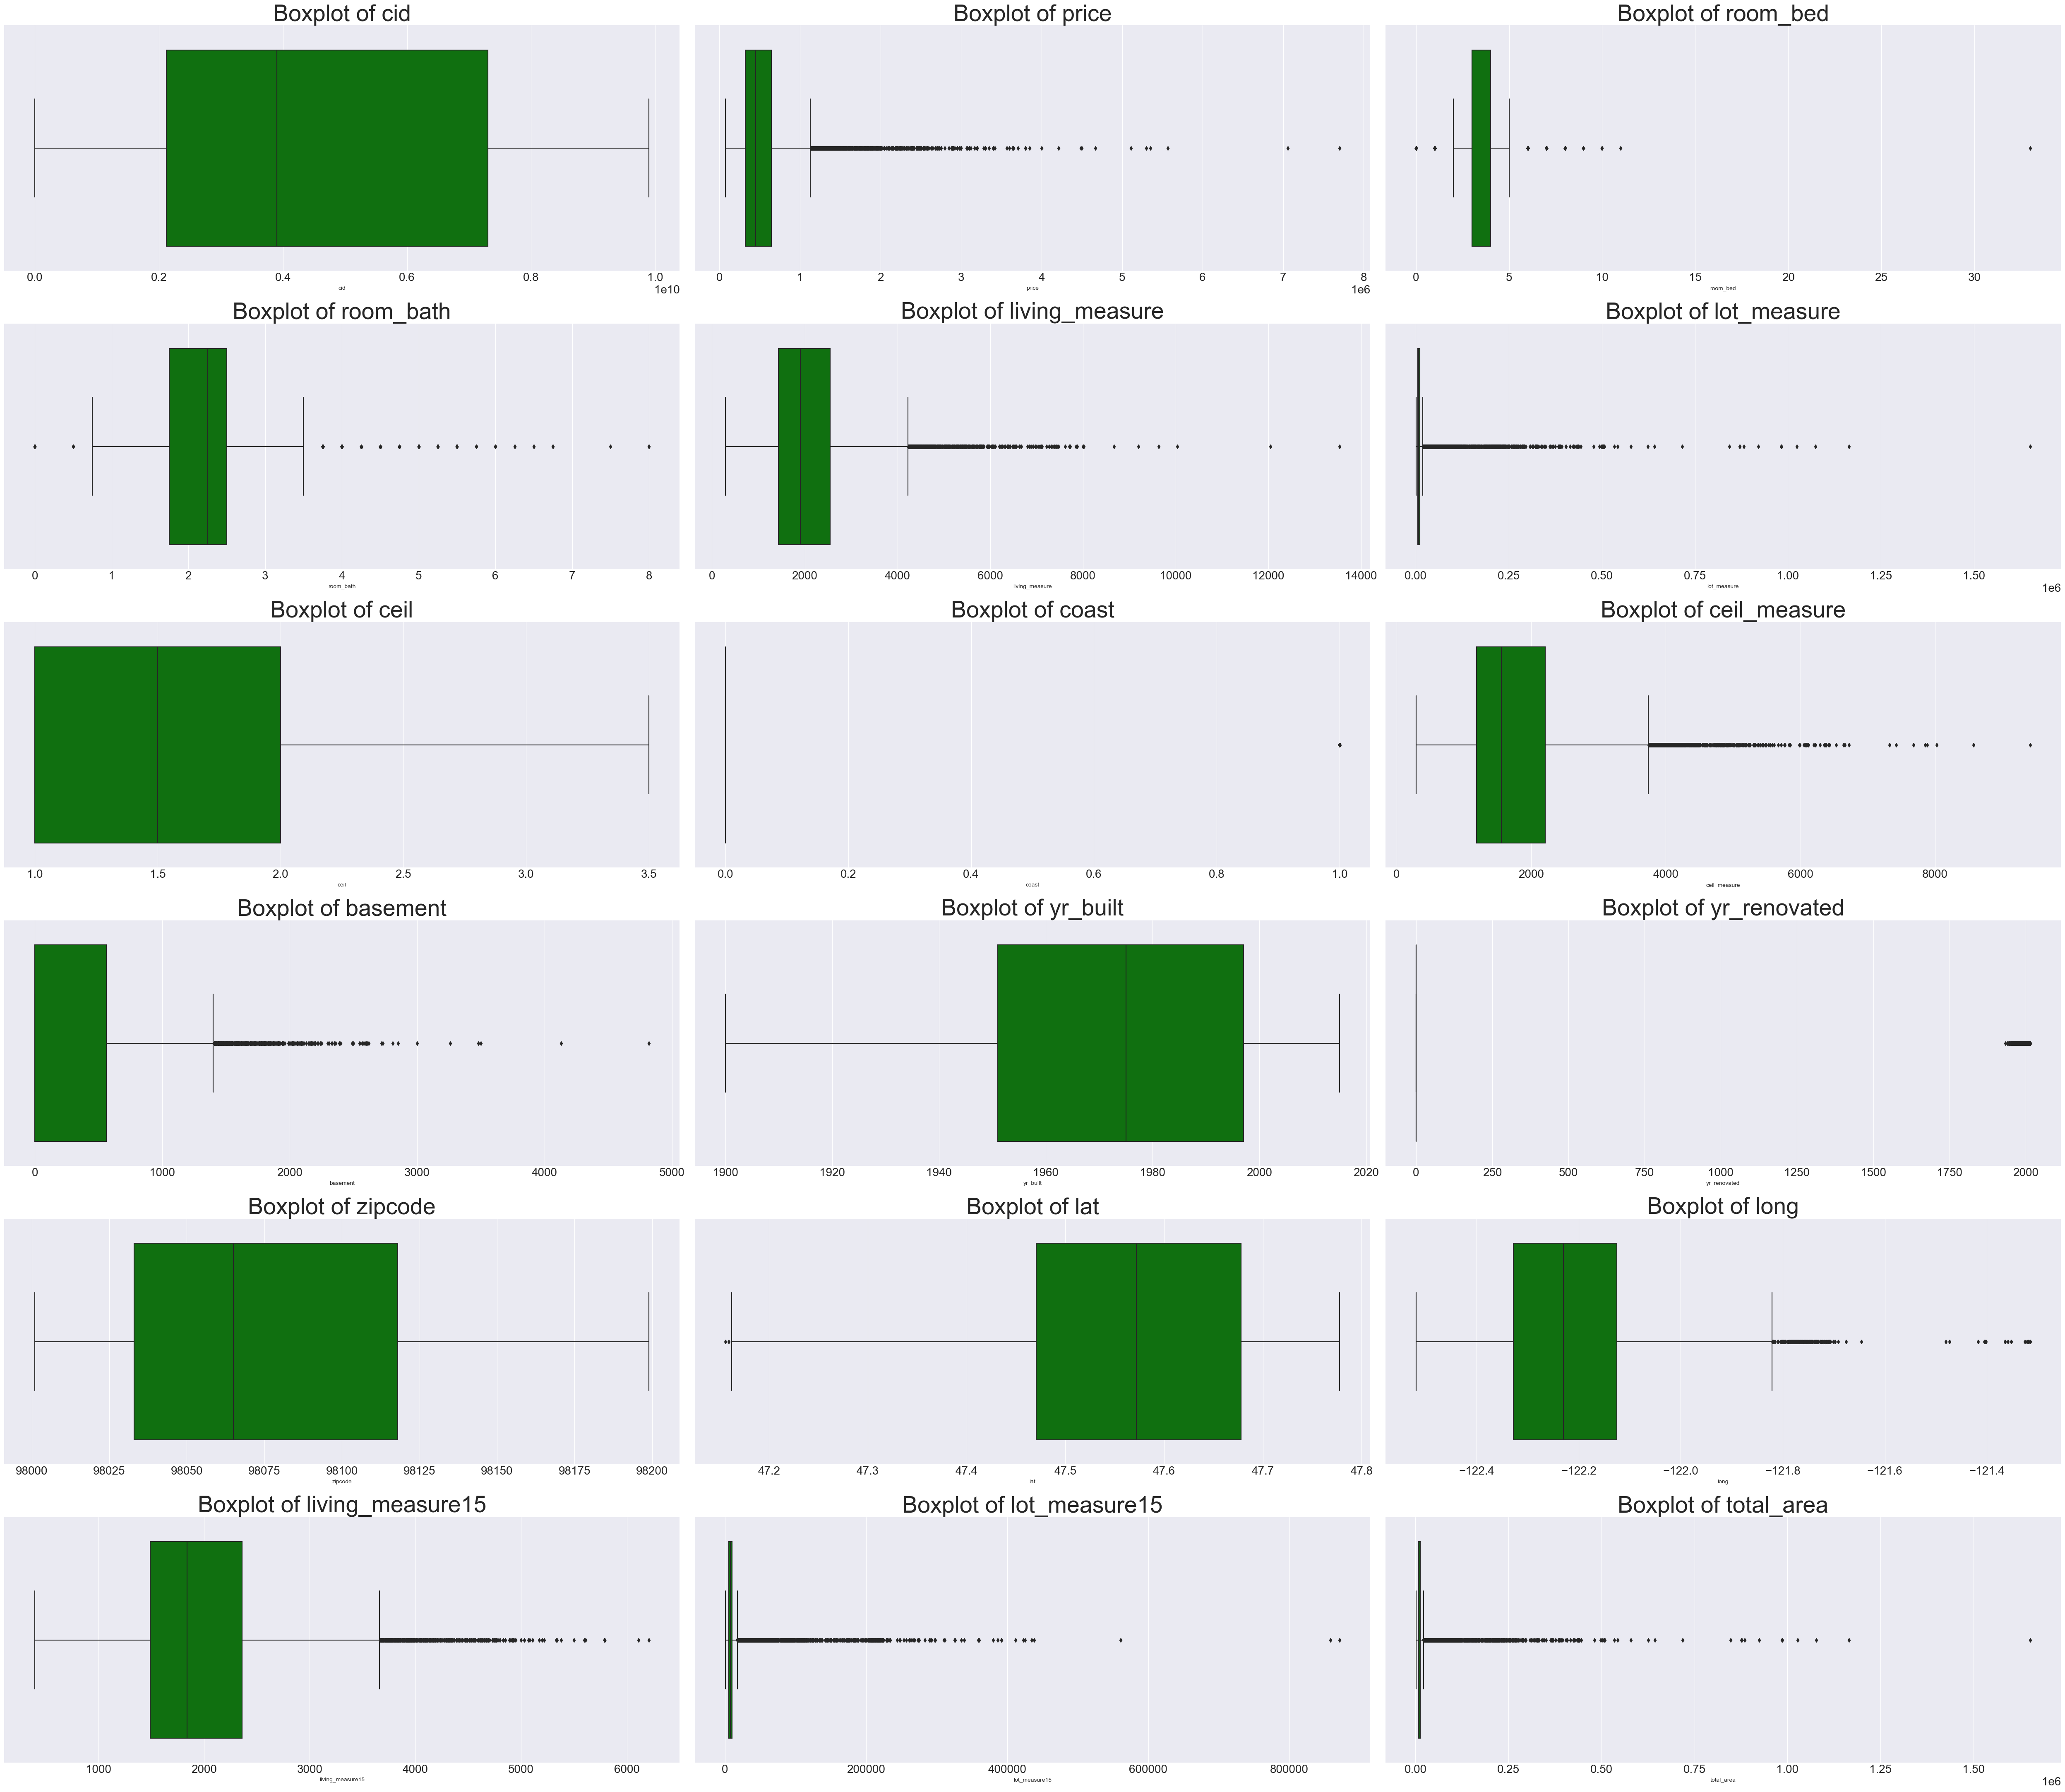

In [104]:
plt.figure(figsize=(50, 50))
feature_list = num.columns

for i in range(len(feature_list)):
    plt.subplot(7, 3, i + 1)
    sns.boxplot(x=num[feature_list[i]], data=df_c,color='green')
    plt.title('Boxplot of {}'.format(feature_list[i]), fontsize=40)  # Increase the title font size
    plt.tight_layout()

plt.show()

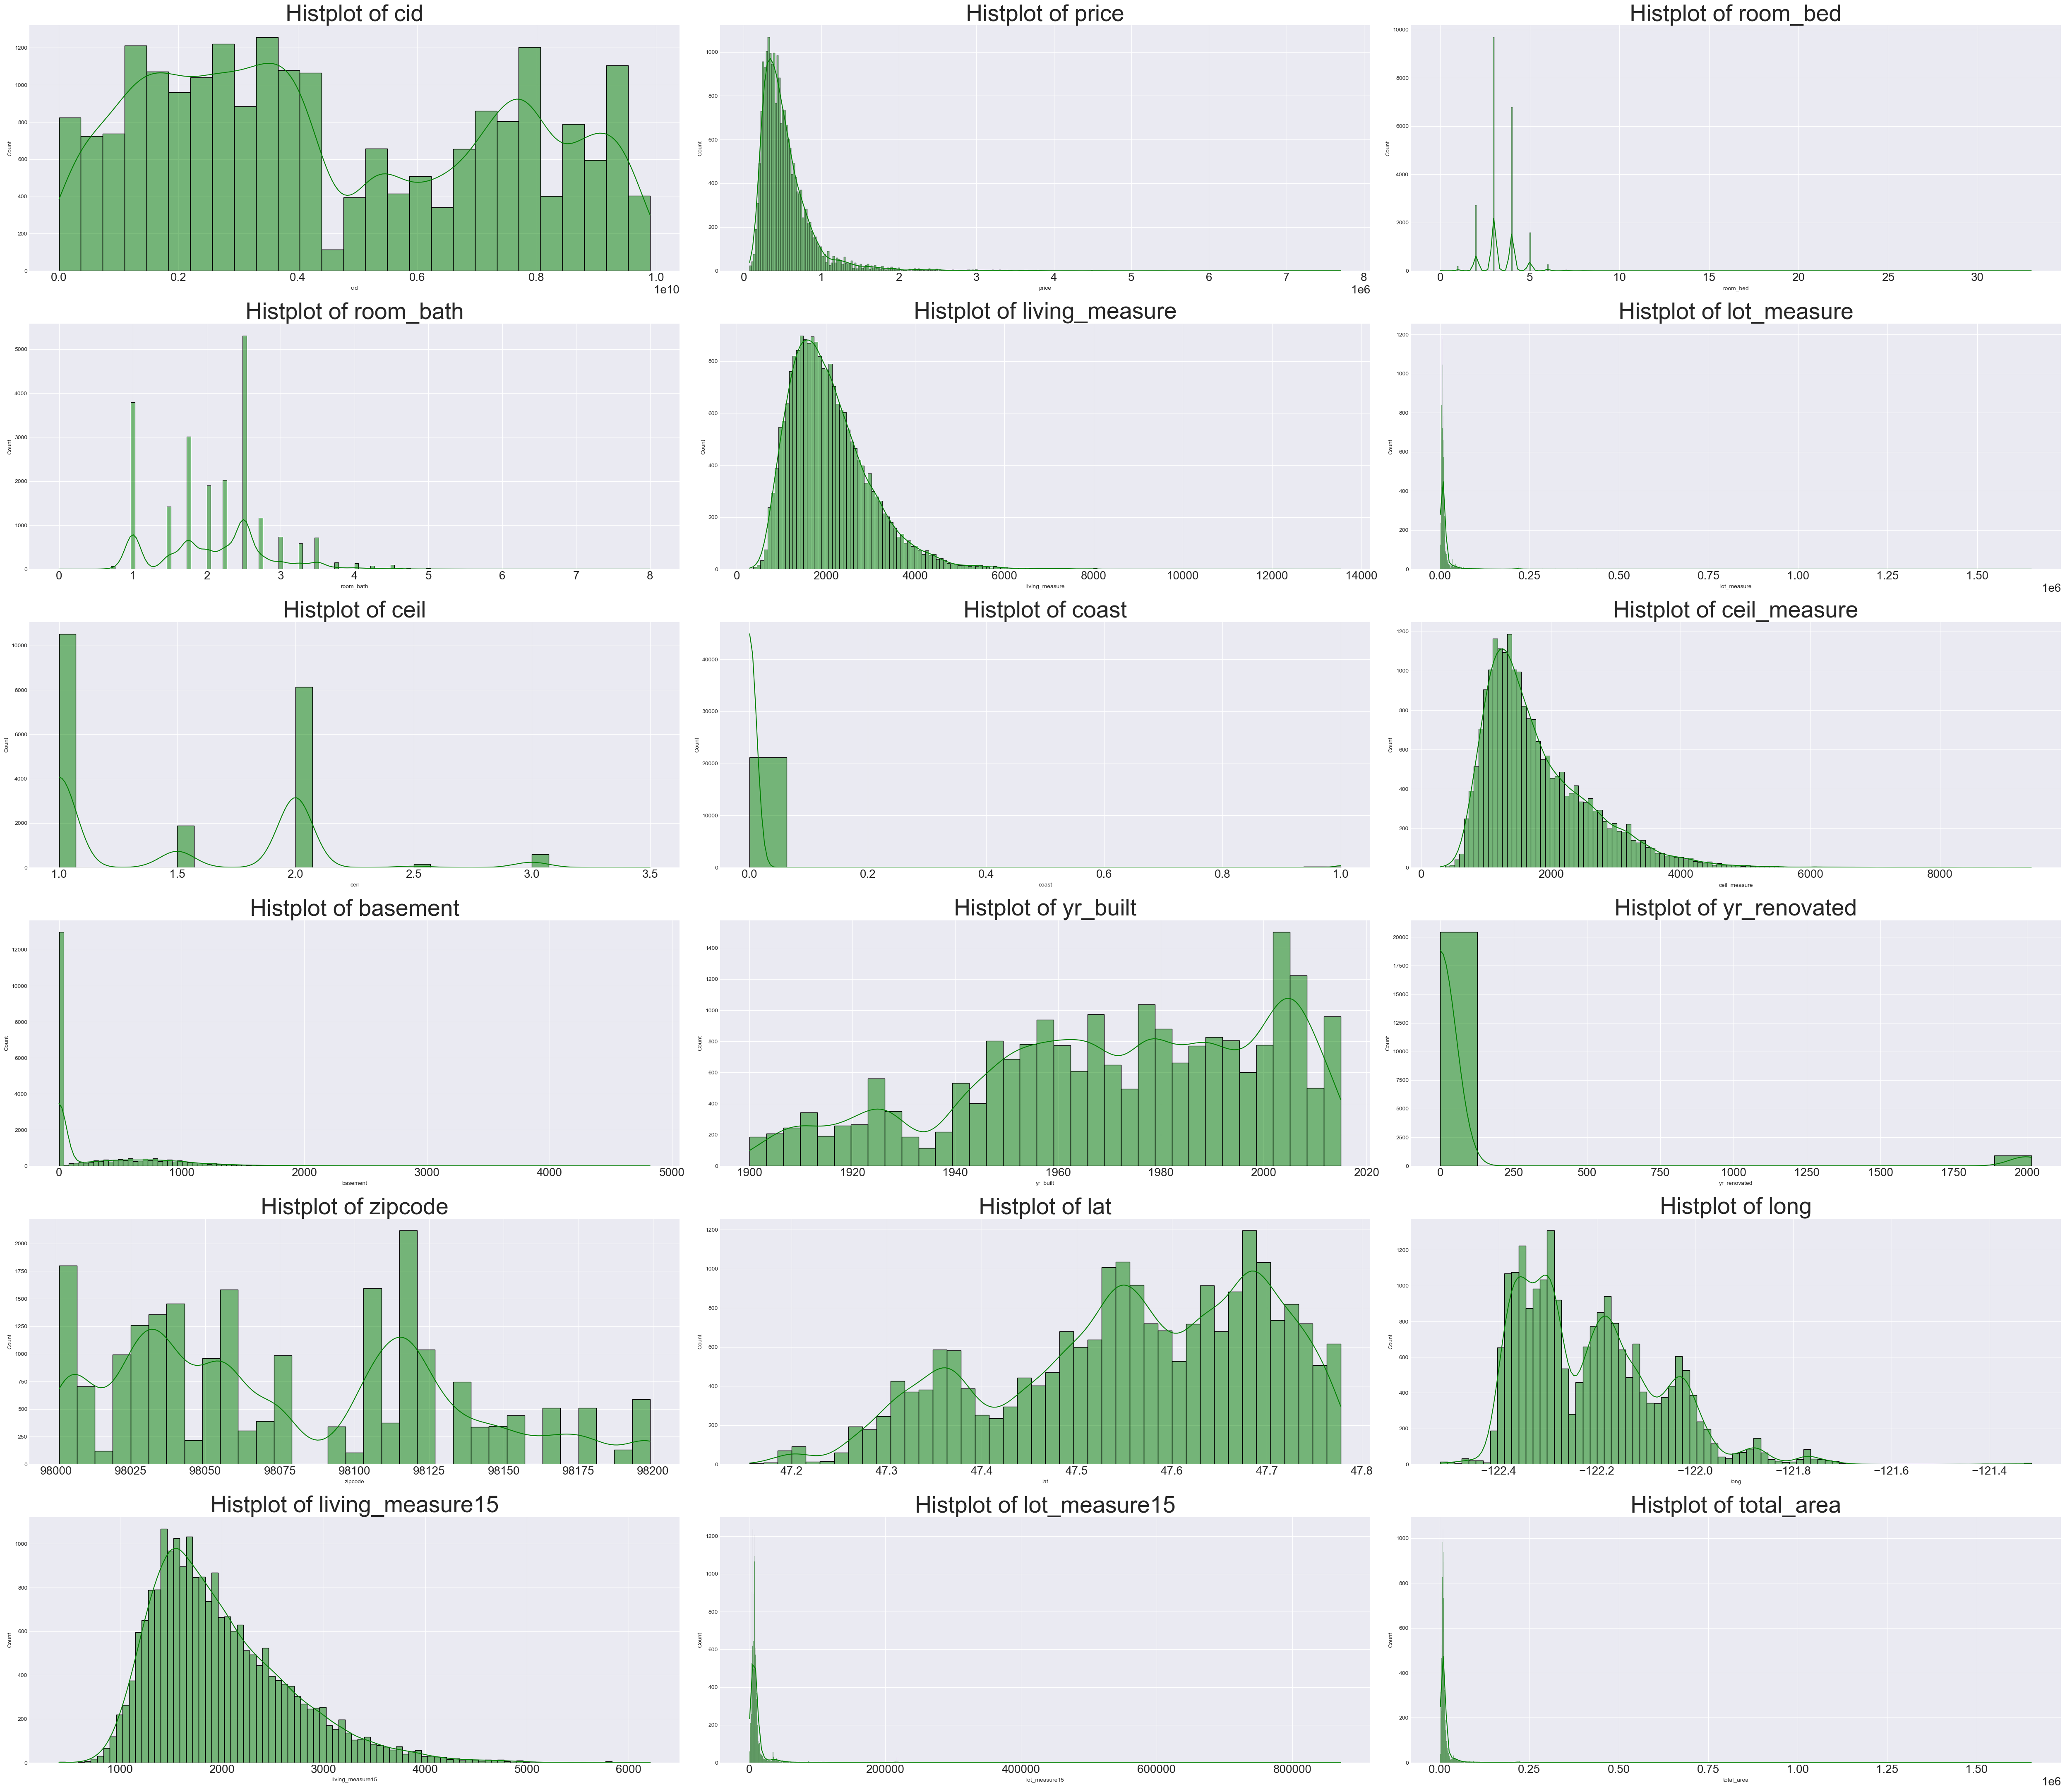

In [105]:
plt.figure(figsize=(50, 50))
feature_list = num.columns

for i in range(len(feature_list)):
    plt.subplot(7, 3, i + 1)
    sns.histplot(x=num[feature_list[i]], data=df_c,kde=True,color='green')
    plt.title('Histplot of {}'.format(feature_list[i]), fontsize=40)  # Increase the title font size
    plt.tight_layout()

plt.show()

In [106]:
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 10
plt.style.use('seaborn-darkgrid')
sns.set_palette(palette='dark')

In [107]:
def univariateAnalysis_numeric(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_c[column].describe(),end=' ') 
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.displot(df_c[column], kde=False, color='green');
    plt.title('Distribution plot of '+ column)
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_c[column])
    plt.title('Box plot of '+ column)
    plt.show()


Description of cid
----------------------------------------------------------------------------
count        21323.0000
mean    4578310233.9299
std     2877281264.1685
min        1000102.0000
25%     2122054055.0000
50%     3904921070.0000
75%     7305300727.5000
max     9900000190.0000
Name: cid, dtype: float64 Distribution of cid
----------------------------------------------------------------------------


<Figure size 1200x800 with 0 Axes>

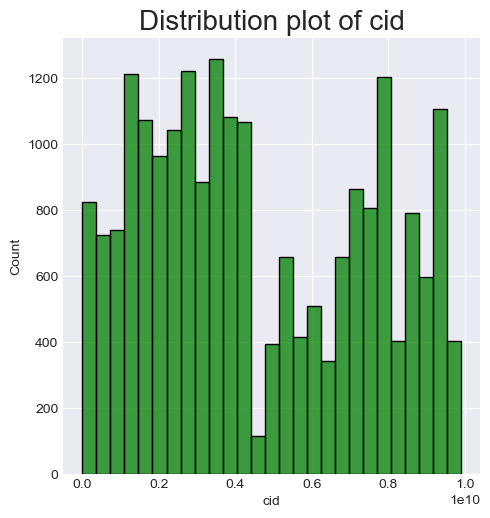

BoxPlot of cid
----------------------------------------------------------------------------


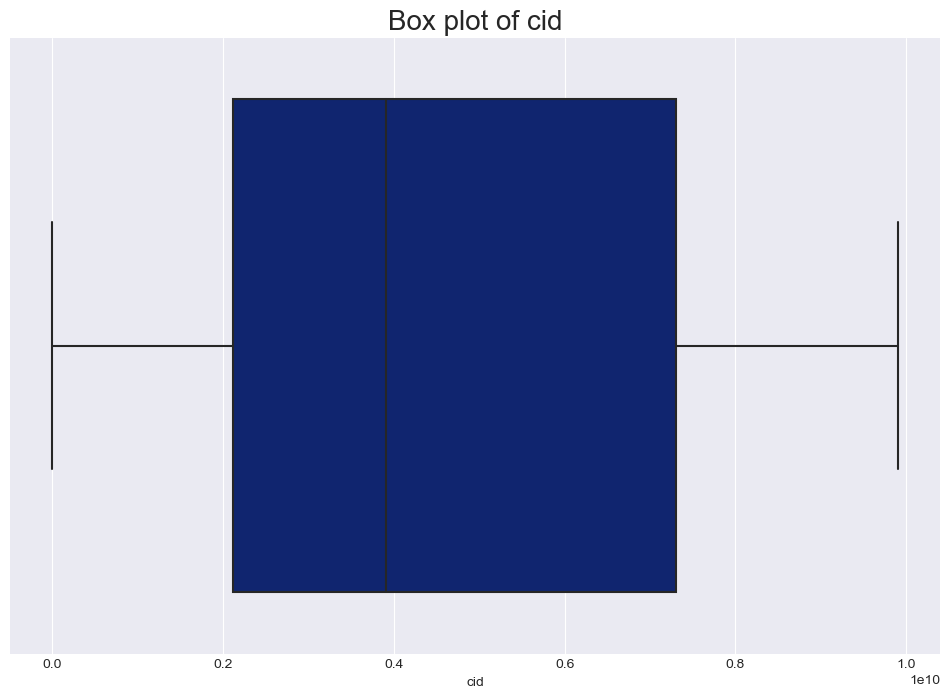

Description of price
----------------------------------------------------------------------------
count     21323.0000
mean     539987.9964
std      365513.2941
min       75000.0000
25%      321013.5000
50%      450000.0000
75%      645000.0000
max     7700000.0000
Name: price, dtype: float64 Distribution of price
----------------------------------------------------------------------------


<Figure size 1200x800 with 0 Axes>

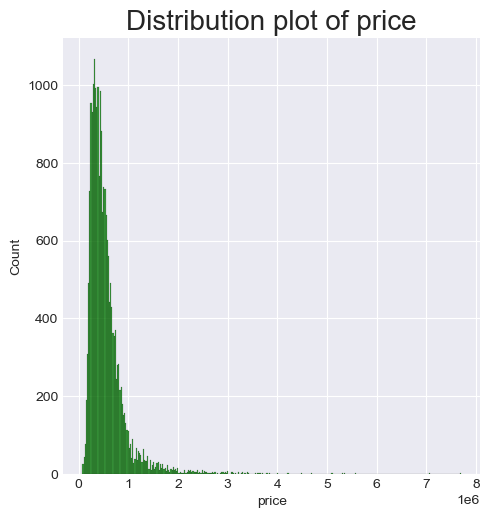

BoxPlot of price
----------------------------------------------------------------------------


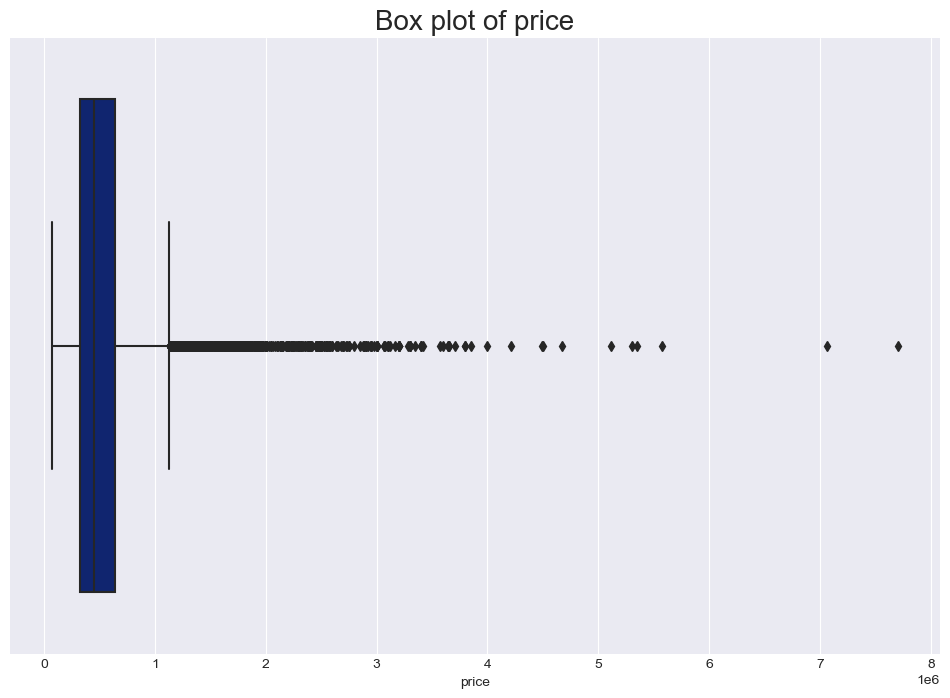

Description of room_bed
----------------------------------------------------------------------------
count   21323.0000
mean        3.3704
std         0.9299
min         0.0000
25%         3.0000
50%         3.0000
75%         4.0000
max        33.0000
Name: room_bed, dtype: float64 Distribution of room_bed
----------------------------------------------------------------------------


<Figure size 1200x800 with 0 Axes>

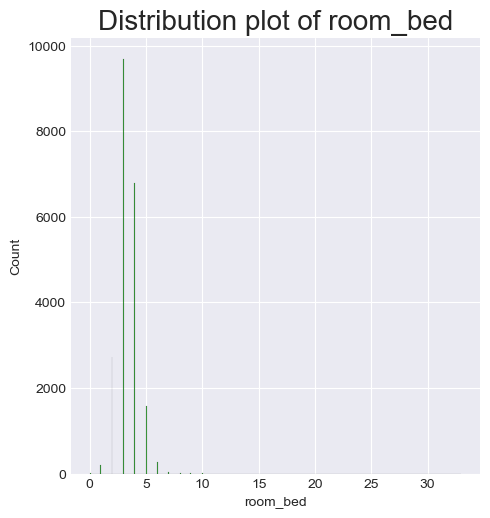

BoxPlot of room_bed
----------------------------------------------------------------------------


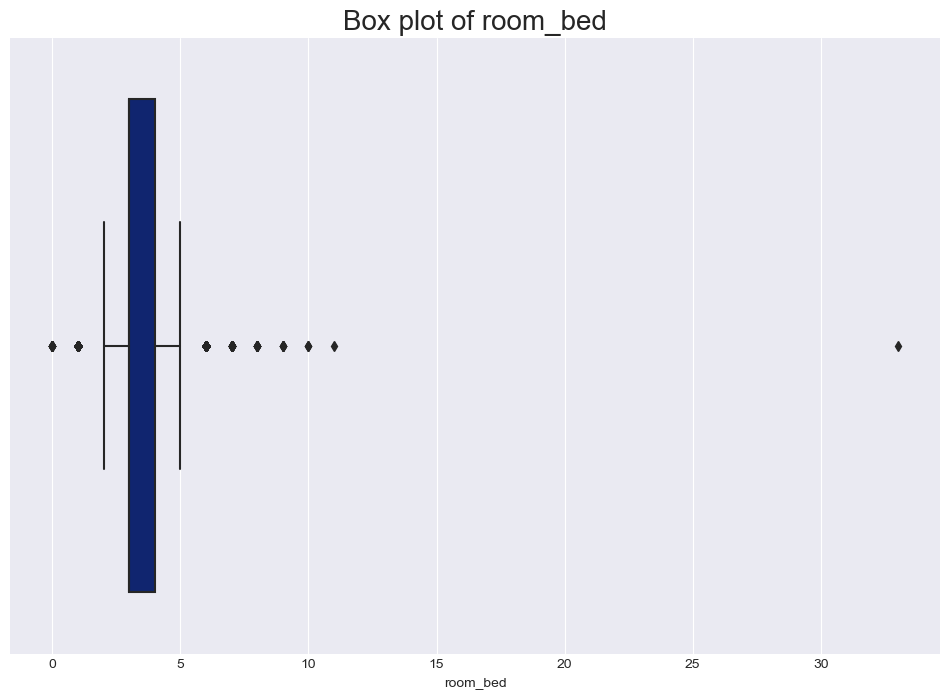

Description of room_bath
----------------------------------------------------------------------------
count   21323.0000
mean        2.4390
std         0.9222
min         0.0000
25%         2.0000
50%         3.0000
75%         3.0000
max         8.0000
Name: room_bath, dtype: float64 Distribution of room_bath
----------------------------------------------------------------------------


<Figure size 1200x800 with 0 Axes>

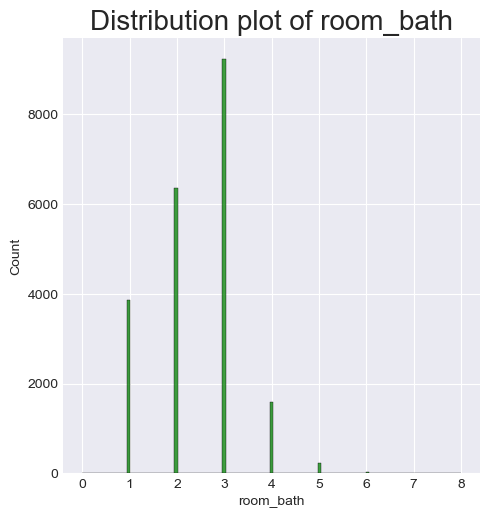

BoxPlot of room_bath
----------------------------------------------------------------------------


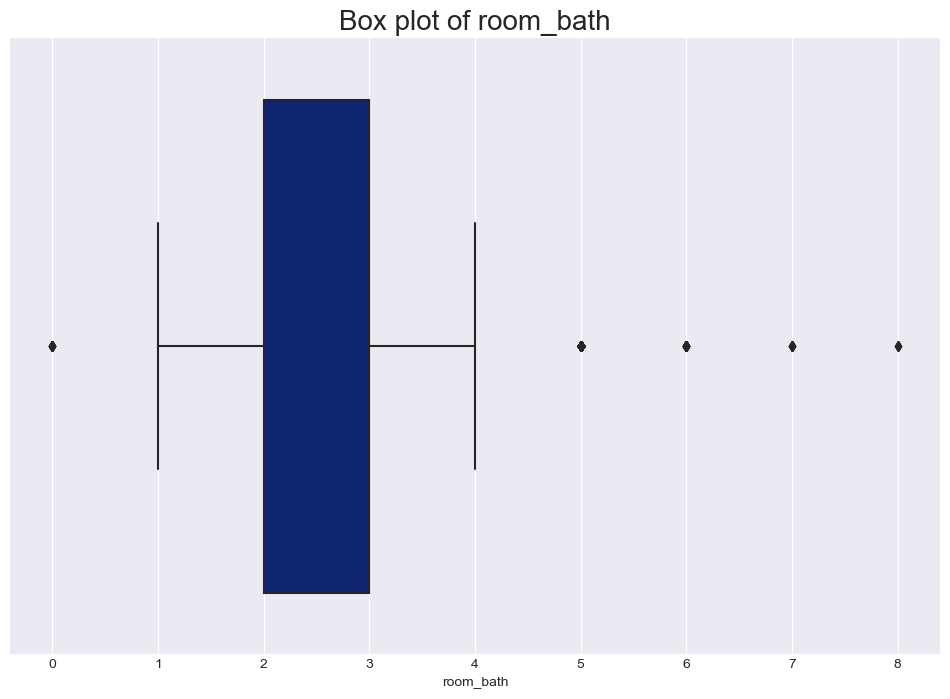

Description of living_measure
----------------------------------------------------------------------------
count   21323.0000
mean     2079.9499
std       917.4192
min       290.0000
25%      1430.0000
50%      1910.0000
75%      2550.0000
max     13540.0000
Name: living_measure, dtype: float64 Distribution of living_measure
----------------------------------------------------------------------------


<Figure size 1200x800 with 0 Axes>

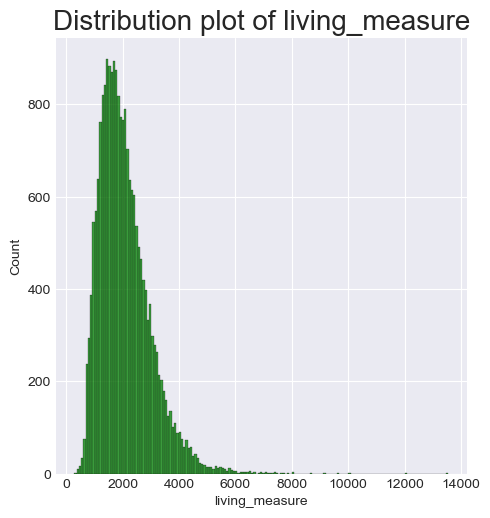

BoxPlot of living_measure
----------------------------------------------------------------------------


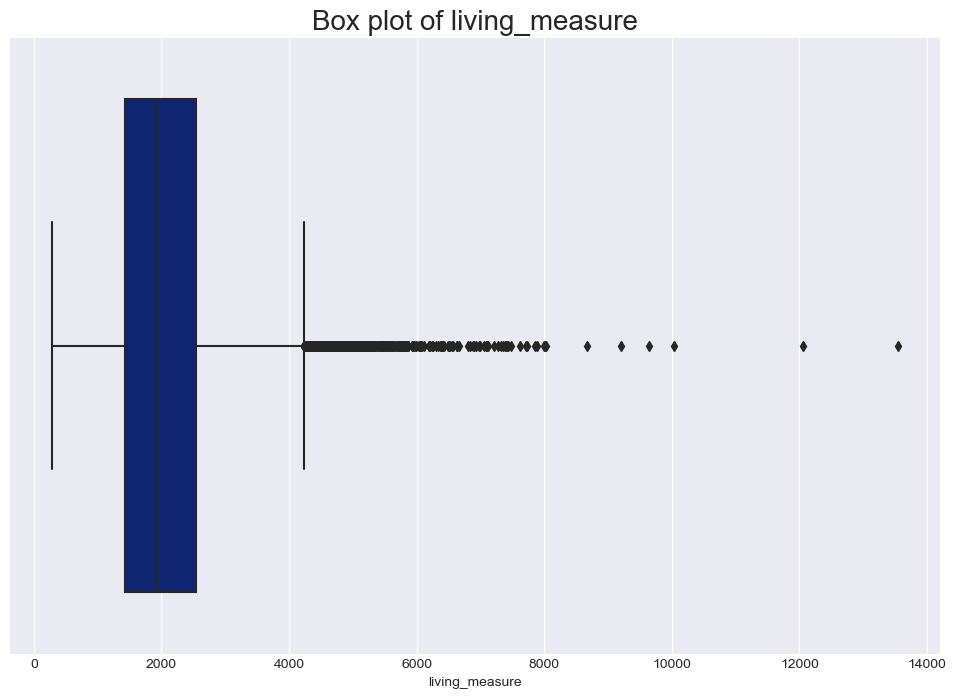

Description of lot_measure
----------------------------------------------------------------------------
count     21323.0000
mean      15100.5395
std       41396.3621
min         520.0000
25%        5043.0000
50%        7620.0000
75%       10684.5000
max     1651359.0000
Name: lot_measure, dtype: float64 Distribution of lot_measure
----------------------------------------------------------------------------


<Figure size 1200x800 with 0 Axes>

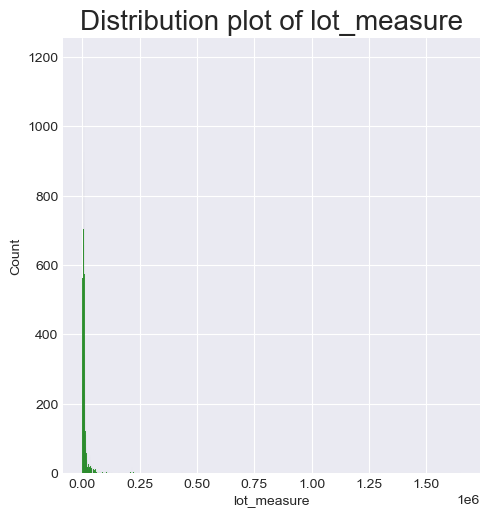

BoxPlot of lot_measure
----------------------------------------------------------------------------


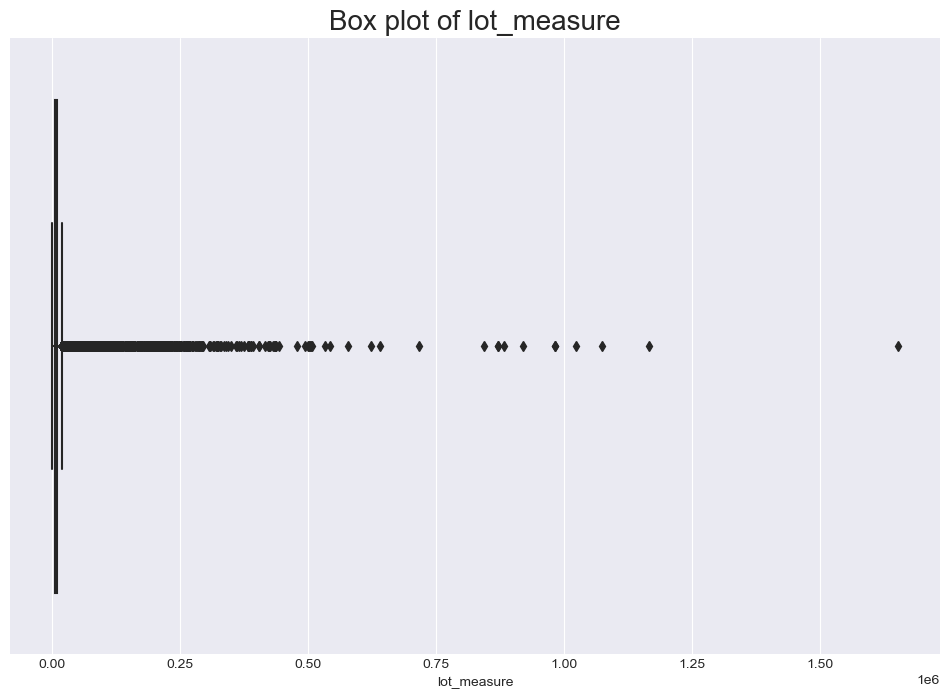

Description of ceil
----------------------------------------------------------------------------
count   21323.0000
mean        1.4467
std         0.5523
min         1.0000
25%         1.0000
50%         1.0000
75%         2.0000
max         3.0000
Name: ceil, dtype: float64 Distribution of ceil
----------------------------------------------------------------------------


<Figure size 1200x800 with 0 Axes>

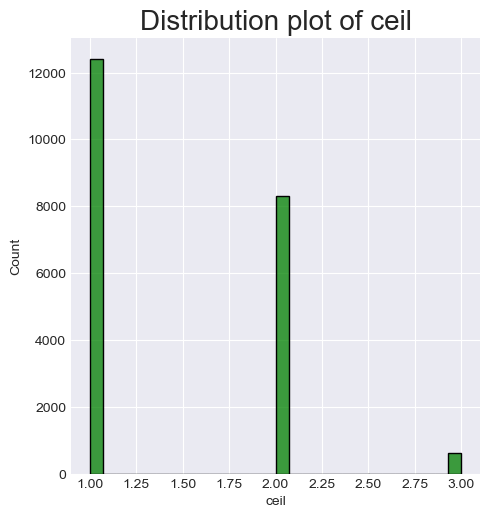

BoxPlot of ceil
----------------------------------------------------------------------------


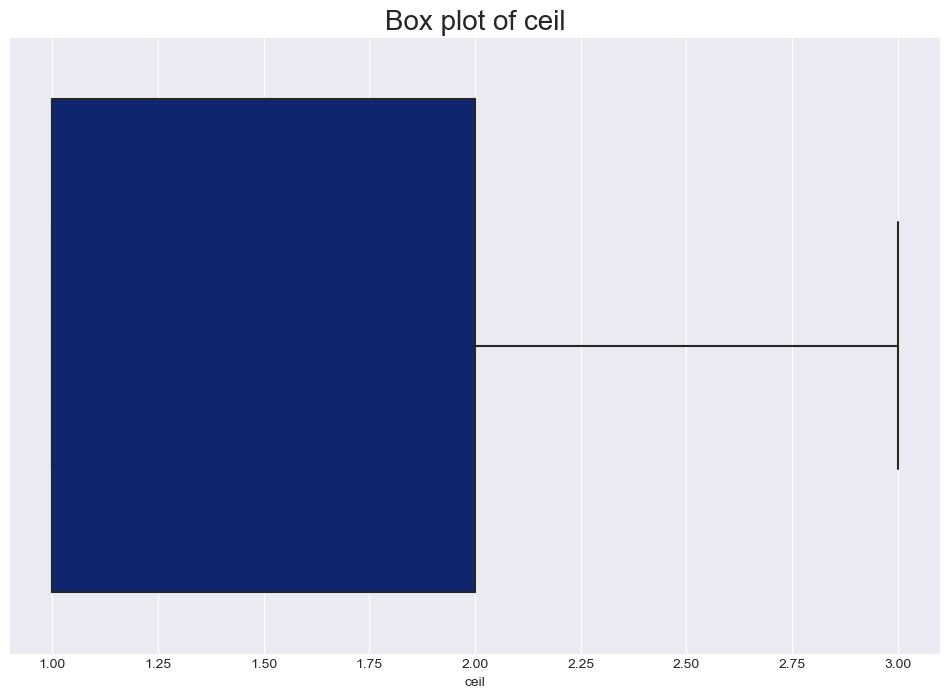

Description of coast
----------------------------------------------------------------------------
count   21323.0000
mean        0.0075
std         0.0863
min         0.0000
25%         0.0000
50%         0.0000
75%         0.0000
max         1.0000
Name: coast, dtype: float64 Distribution of coast
----------------------------------------------------------------------------


<Figure size 1200x800 with 0 Axes>

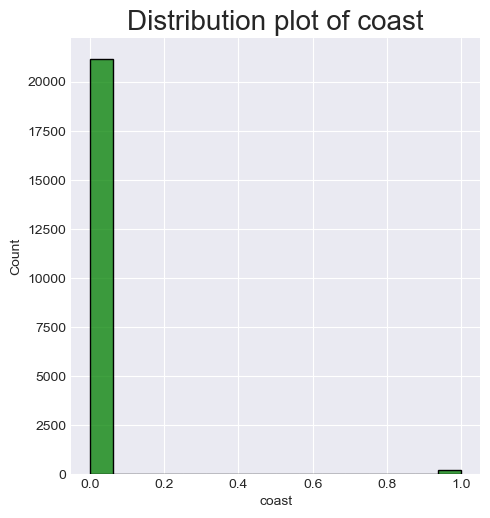

BoxPlot of coast
----------------------------------------------------------------------------


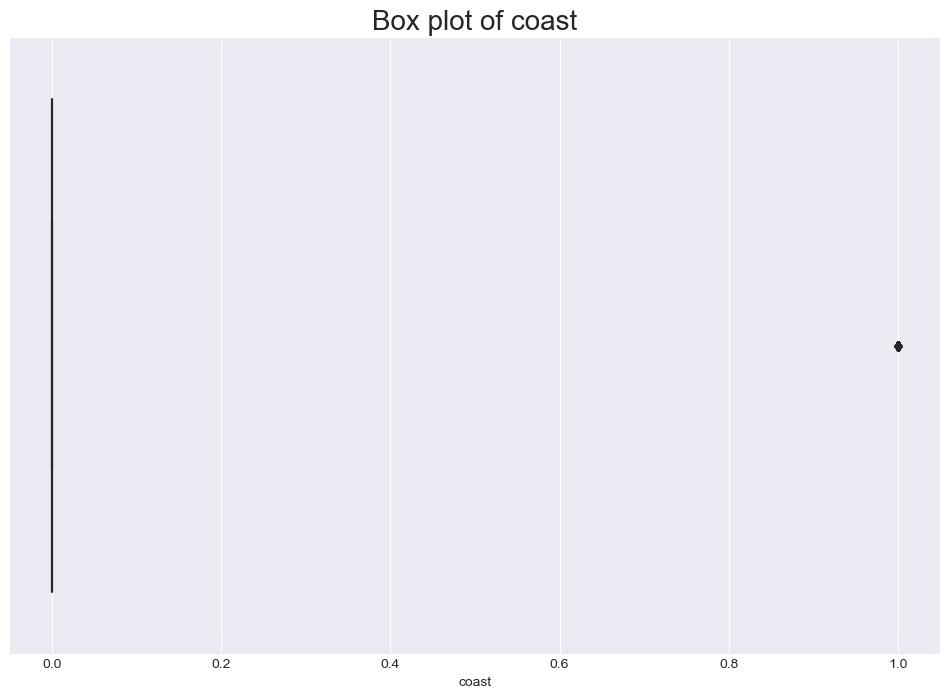

Description of ceil_measure
----------------------------------------------------------------------------
count   21323.0000
mean     1788.7803
std       827.3440
min       290.0000
25%      1190.0000
50%      1560.0000
75%      2210.0000
max      9410.0000
Name: ceil_measure, dtype: float64 Distribution of ceil_measure
----------------------------------------------------------------------------


<Figure size 1200x800 with 0 Axes>

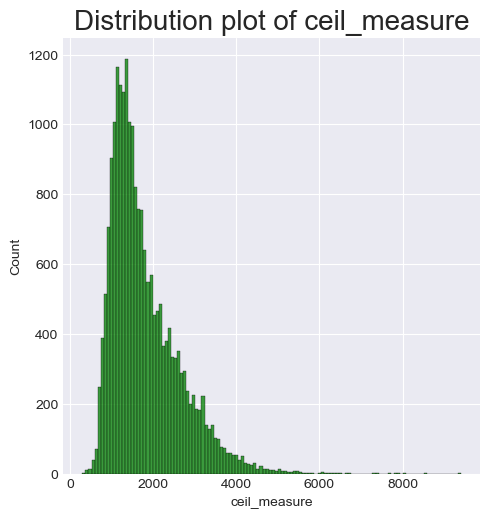

BoxPlot of ceil_measure
----------------------------------------------------------------------------


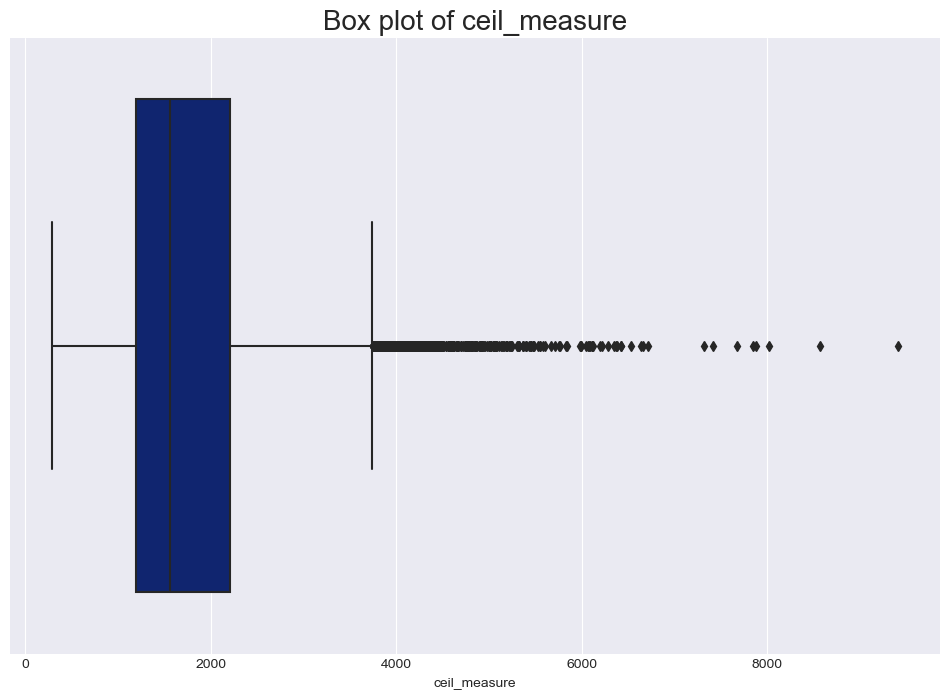

Description of basement
----------------------------------------------------------------------------
count   21323.0000
mean      291.1696
std       442.5825
min         0.0000
25%         0.0000
50%         0.0000
75%       560.0000
max      4820.0000
Name: basement, dtype: float64 Distribution of basement
----------------------------------------------------------------------------


<Figure size 1200x800 with 0 Axes>

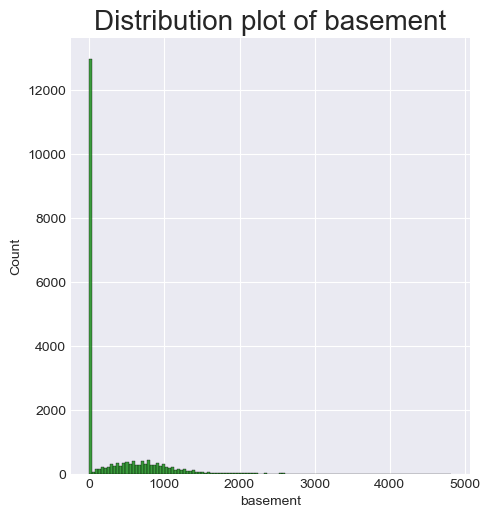

BoxPlot of basement
----------------------------------------------------------------------------


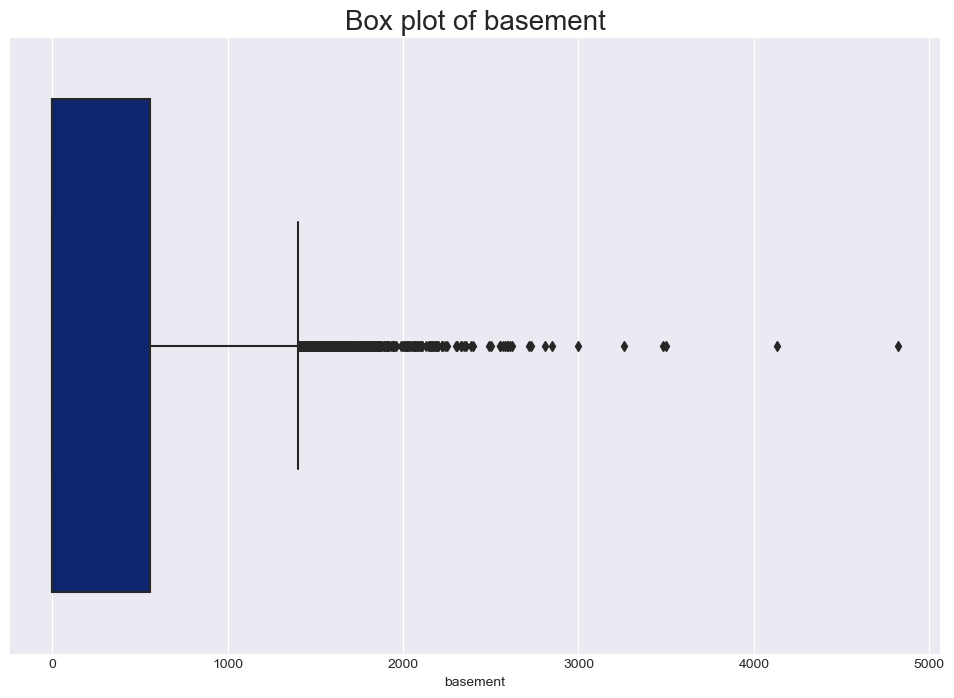

Description of yr_built
----------------------------------------------------------------------------
count   21323.0000
mean     1971.0342
std        29.3843
min      1900.0000
25%      1951.0000
50%      1975.0000
75%      1997.0000
max      2015.0000
Name: yr_built, dtype: float64 Distribution of yr_built
----------------------------------------------------------------------------


<Figure size 1200x800 with 0 Axes>

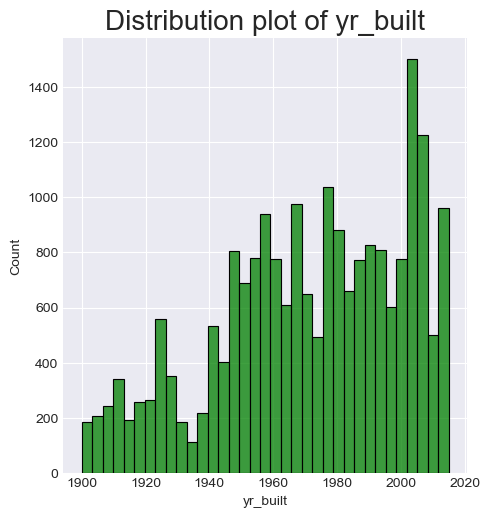

BoxPlot of yr_built
----------------------------------------------------------------------------


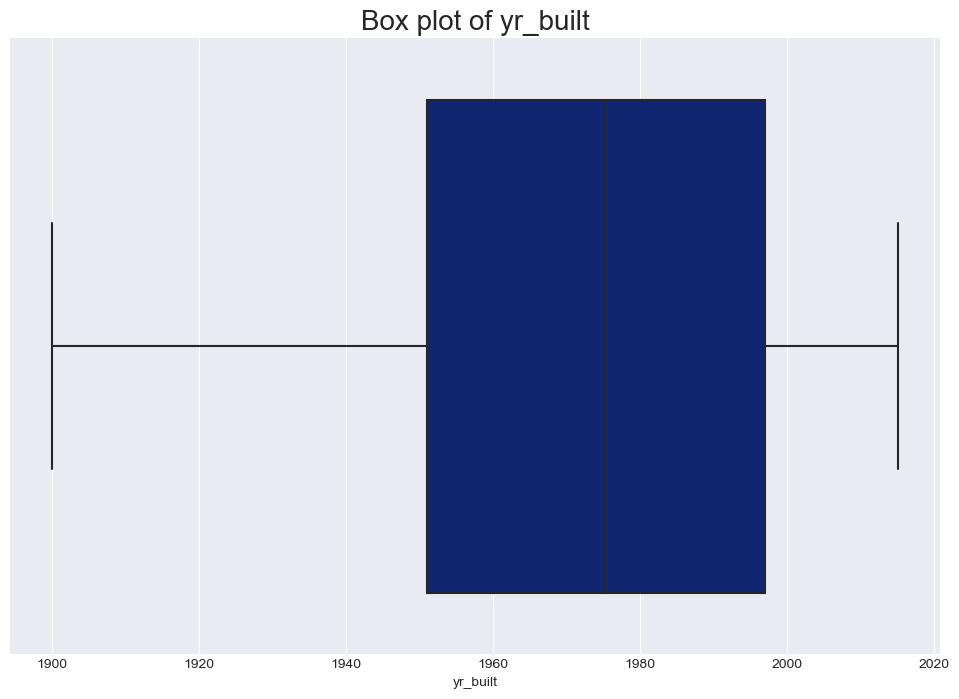

Description of yr_renovated
----------------------------------------------------------------------------
count   21323.0000
mean       83.7703
std       400.2356
min         0.0000
25%         0.0000
50%         0.0000
75%         0.0000
max      2015.0000
Name: yr_renovated, dtype: float64 Distribution of yr_renovated
----------------------------------------------------------------------------


<Figure size 1200x800 with 0 Axes>

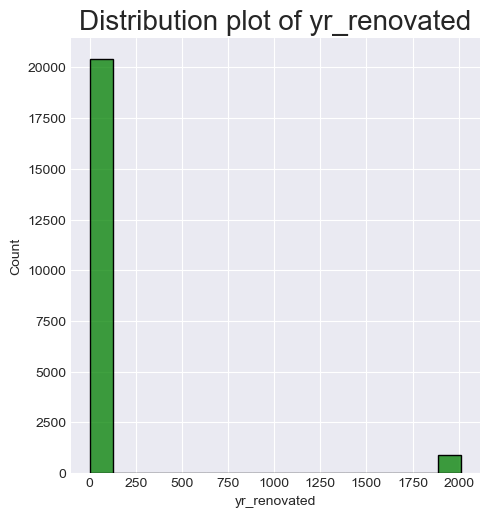

BoxPlot of yr_renovated
----------------------------------------------------------------------------


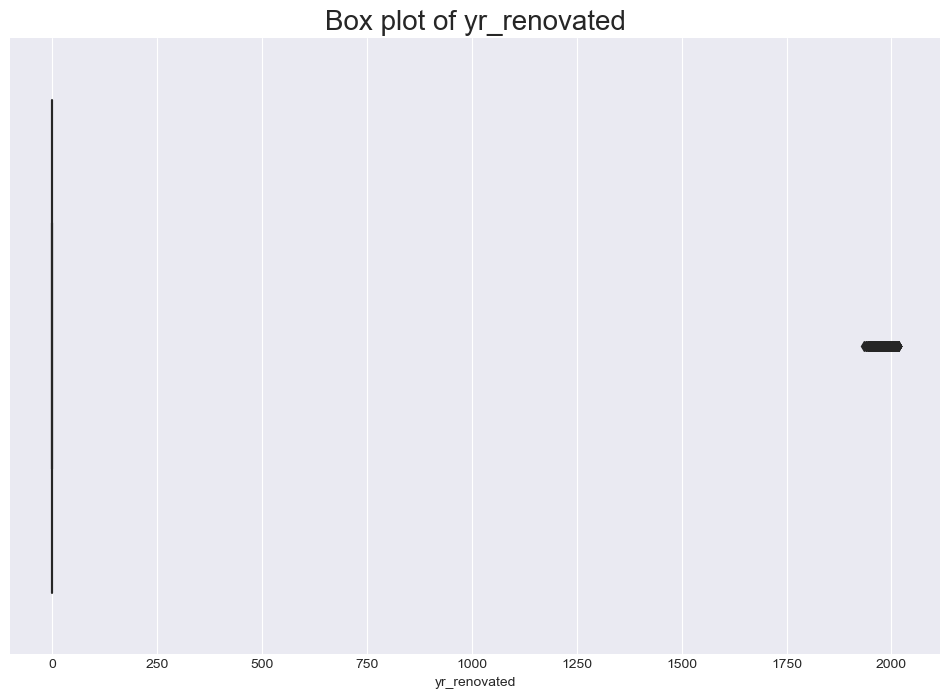

Description of zipcode
----------------------------------------------------------------------------
count   21323.0000
mean    98077.8894
std        53.5011
min     98001.0000
25%     98033.0000
50%     98065.0000
75%     98118.0000
max     98199.0000
Name: zipcode, dtype: float64 Distribution of zipcode
----------------------------------------------------------------------------


<Figure size 1200x800 with 0 Axes>

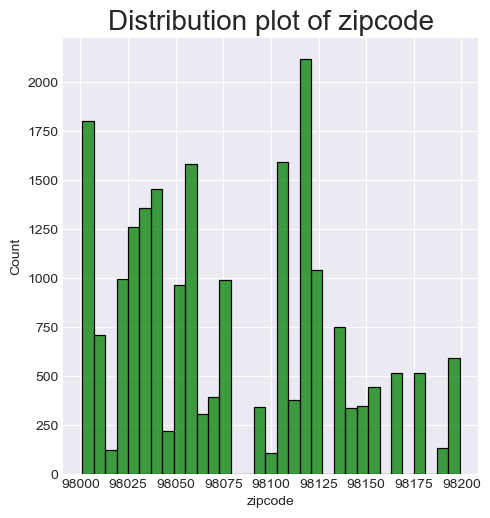

BoxPlot of zipcode
----------------------------------------------------------------------------


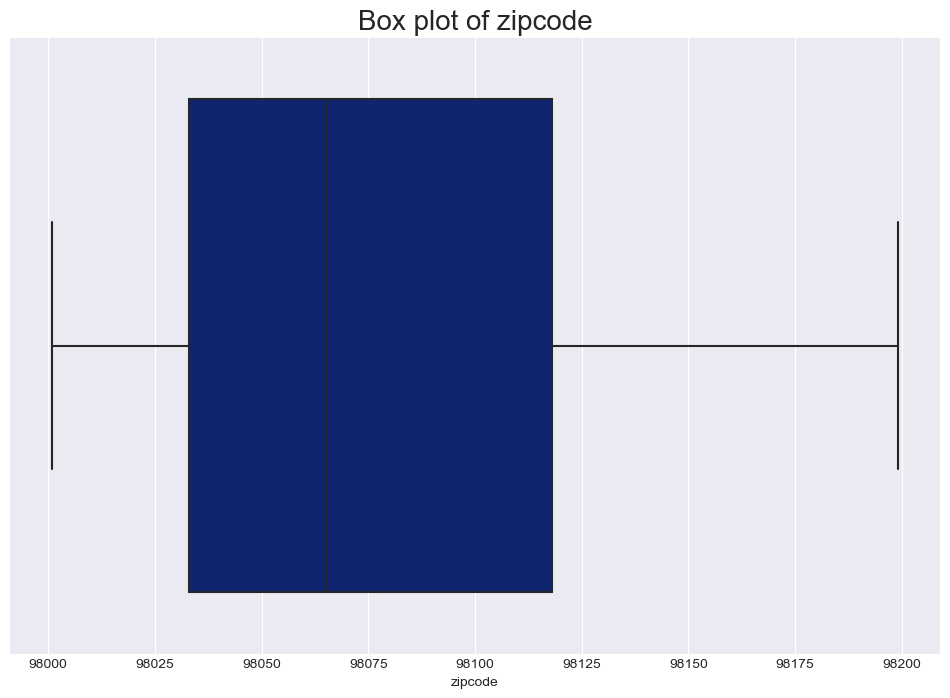

Description of lat
----------------------------------------------------------------------------
count   21323.0000
mean       47.5600
std         0.1386
min        47.1559
25%        47.4706
50%        47.5717
75%        47.6780
max        47.7776
Name: lat, dtype: float64 Distribution of lat
----------------------------------------------------------------------------


<Figure size 1200x800 with 0 Axes>

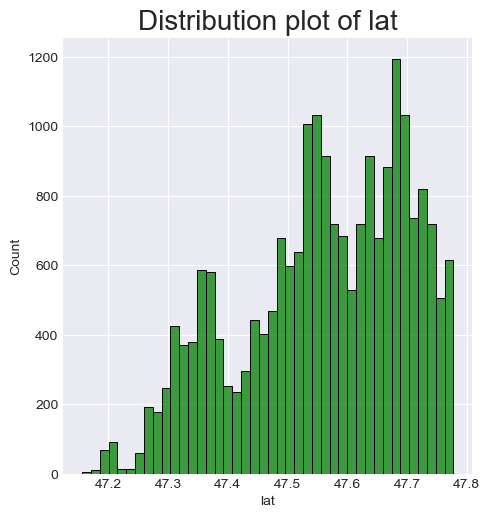

BoxPlot of lat
----------------------------------------------------------------------------


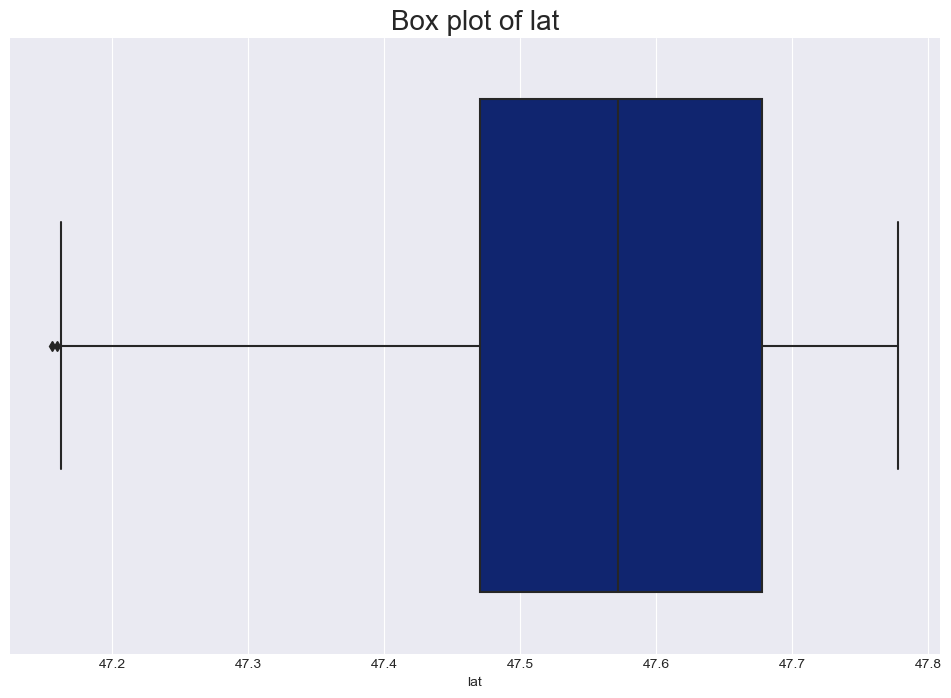

Description of long
----------------------------------------------------------------------------
count   21323.0000
mean     -122.2138
std         0.1408
min      -122.5190
25%      -122.3280
50%      -122.2300
75%      -122.1250
max      -121.3150
Name: long, dtype: float64 Distribution of long
----------------------------------------------------------------------------


<Figure size 1200x800 with 0 Axes>

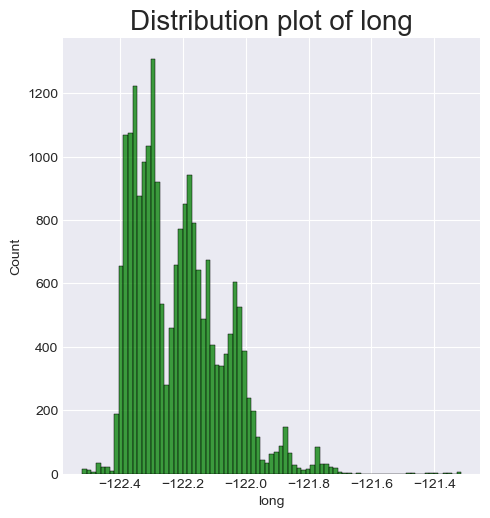

BoxPlot of long
----------------------------------------------------------------------------


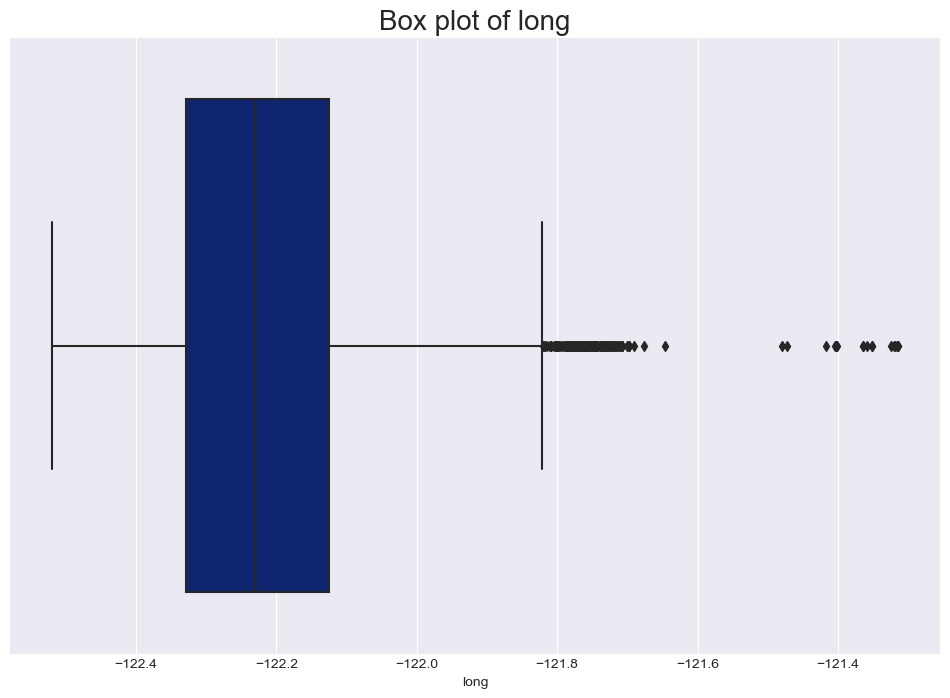

Description of living_measure15
----------------------------------------------------------------------------
count   21323.0000
mean     1987.1720
std       685.6484
min       399.0000
25%      1490.0000
50%      1840.0000
75%      2360.0000
max      6210.0000
Name: living_measure15, dtype: float64 Distribution of living_measure15
----------------------------------------------------------------------------


<Figure size 1200x800 with 0 Axes>

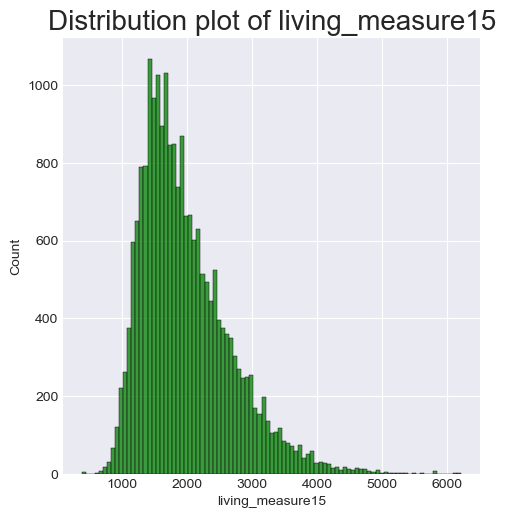

BoxPlot of living_measure15
----------------------------------------------------------------------------


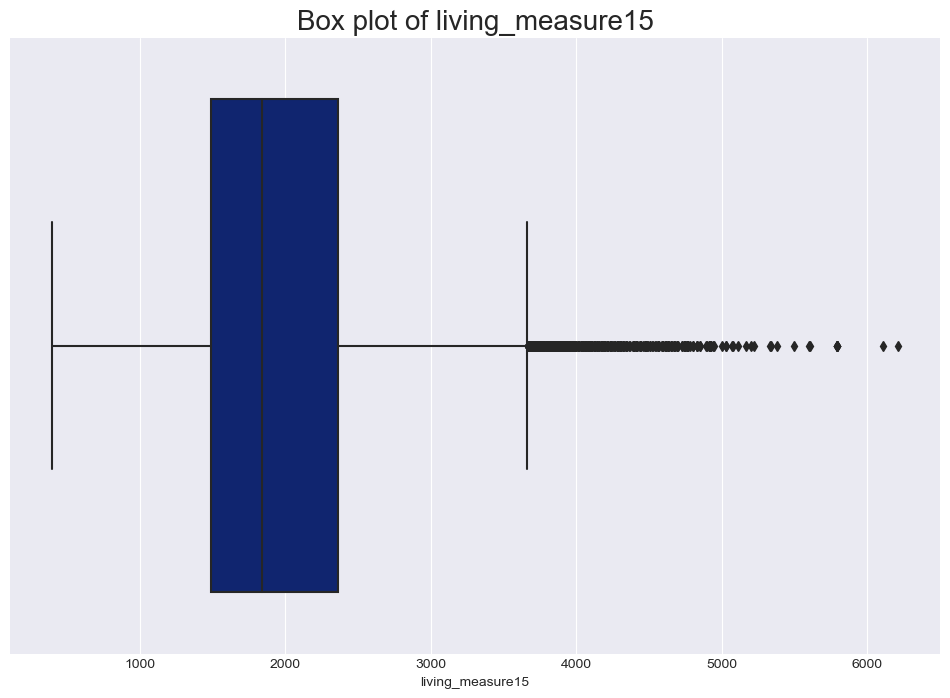

Description of lot_measure15
----------------------------------------------------------------------------
count    21323.0000
mean     12757.7356
std      27234.5711
min        651.0000
25%       5100.0000
50%       7620.0000
75%      10083.0000
max     871200.0000
Name: lot_measure15, dtype: float64 Distribution of lot_measure15
----------------------------------------------------------------------------


<Figure size 1200x800 with 0 Axes>

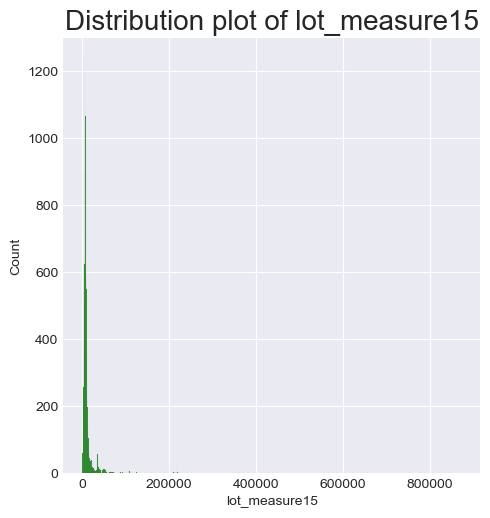

BoxPlot of lot_measure15
----------------------------------------------------------------------------


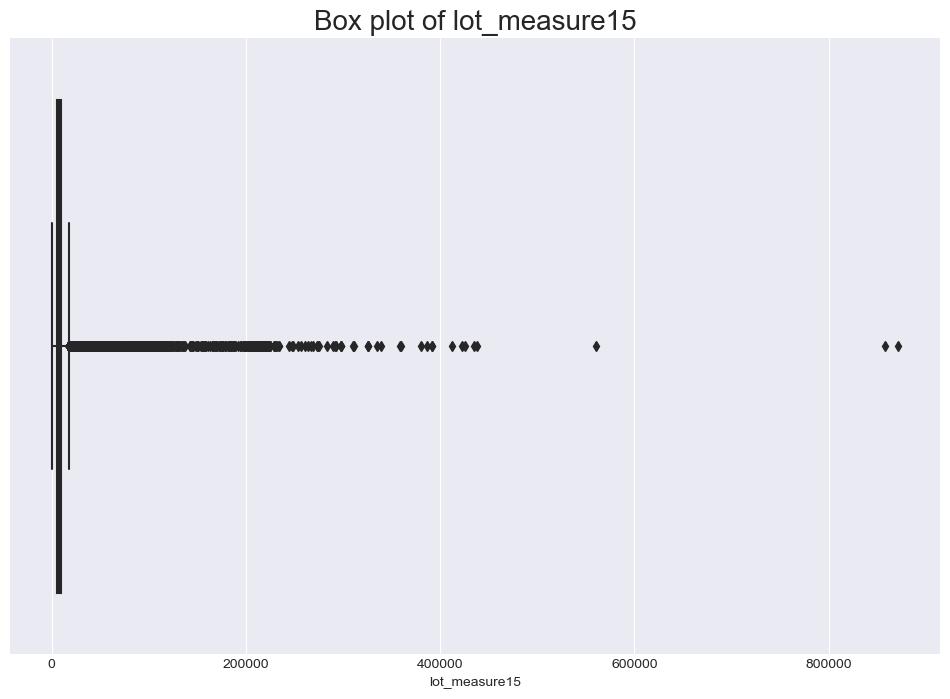

Description of total_area
----------------------------------------------------------------------------
count     21323.0000
mean      17180.4894
std       41563.9769
min        1423.0000
25%        7040.0000
50%        9580.0000
75%       12997.0000
max     1652659.0000
Name: total_area, dtype: float64 Distribution of total_area
----------------------------------------------------------------------------


<Figure size 1200x800 with 0 Axes>

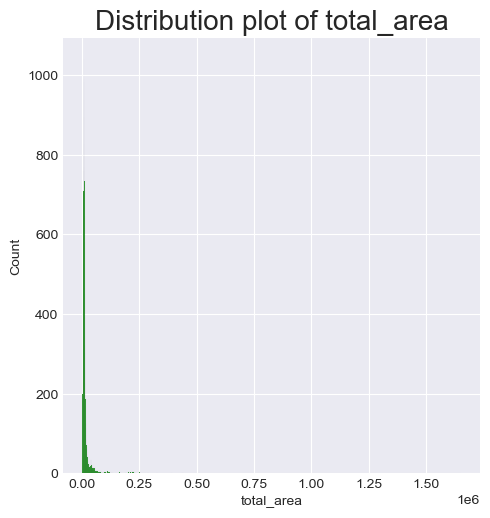

BoxPlot of total_area
----------------------------------------------------------------------------


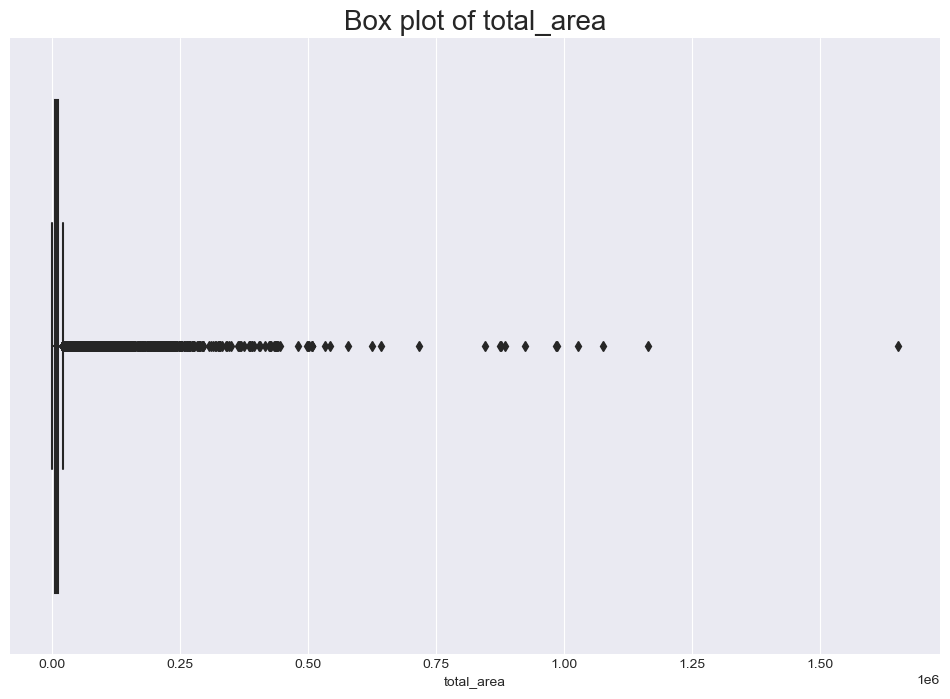

In [108]:
for x in num.columns:
    univariateAnalysis_numeric(x)

In [109]:
#Let's look at the distribution of price at different percentiles
print("0.5% properties have a price lower than {0: .2f}".format(np.percentile(df_c["price"], 0.5)))
print("1% properties have a price lower than {0: .2f}".format(np.percentile(df_c["price"], 1)))
print("5% properties have a price lower than {0: .2f}".format(np.percentile(df_c["price"], 5)))
print("10% properties have a price lower than {0: .2f}".format(np.percentile(df_c["price"], 10)))
print("90% properties have a price lower than {0: .2f}".format(np.percentile(df_c["price"], 90)))
print("95% properties have a price lower than {0: .2f}".format(np.percentile(df_c["price"], 95)))
print("98% properties have a price lower than {0: .2f}".format(np.percentile(df_c["price"], 98)))
print("98.5% properties have a price lower than {0: .2f}".format(np.percentile(df_c["price"], 98.5)))
print("99% properties have a price lower than {0: .2f}".format(np.percentile(df_c["price"], 99)))
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(df_c["price"], 99.5)))
print("99.7% properties have a price lower than {0: .2f}".format(np.percentile(df_c["price"], 99.7)))
print("99.9% properties have a price lower than {0: .2f}".format(np.percentile(df_c["price"], 99.9)))
print("100% properties have a price lower than {0: .2f}".format(np.percentile(df_c["price"], 100)))

0.5% properties have a price lower than  134610.00
1% properties have a price lower than  154000.00
5% properties have a price lower than  210000.00
10% properties have a price lower than  245000.00
90% properties have a price lower than  887450.00
95% properties have a price lower than  1160000.00
98% properties have a price lower than  1600000.00
98.5% properties have a price lower than  1750000.00
99% properties have a price lower than  1967800.00
99.5% properties have a price lower than  2453900.00
99.7% properties have a price lower than  2880340.00
99.9% properties have a price lower than  3413560.00
100% properties have a price lower than  7700000.00


In [110]:
df_c['price'].sort_values(ascending=True)

17946      75000
20344      78000
10847      80000
13068      81000
11003      82000
          ...   
4445     5300000
1031     5350000
12794    5570000
10718    7060000
1068     7700000
Name: price, Length: 21323, dtype: int64

In [111]:
top_01_df = df_c[df_c['price']>(np.percentile(df_c["price"], 99.9))]

In [112]:
df_c[df_c['room_bed']>11]

cid  Sold_date   price  room_bed  room_bath  living_measure  \
16913  2402100895 2014-06-25  640000   33.0000     2.0000       1620.0000   

       lot_measure   ceil  coast  sight condition quality  ceil_measure  \
16913    6000.0000 1.0000 0.0000 0.0000         5  7.0000     1040.0000   

       basement  yr_built  yr_renovated  zipcode     lat      long  \
16913  580.0000      1947             0    98103 47.6878 -122.3310   

       living_measure15  lot_measure15 furnished  total_area  
16913         1330.0000      4700.0000    0.0000        7620

In [113]:
# We will drop all the rows which have more than 11 bedroom

In [114]:
rows_to_drop_3 = df_c[df_c['room_bed']>11].index
df_c = df_c.drop(rows_to_drop_3)

In [115]:
df_c[df_c['living_measure']>10000]

cid  Sold_date    price  room_bed  room_bath  living_measure  \
1068   6762700020 2014-10-13  7700000    6.0000     8.0000      12050.0000   
7928   1225069038 2014-05-05  2280000    7.0000     8.0000      13540.0000   
10718  9808700762 2014-06-11  7060000    5.0000     5.0000      10040.0000   

       lot_measure   ceil  coast  sight condition quality  ceil_measure  \
1068    27600.0000 2.0000 0.0000 3.0000         4 13.0000     8570.0000   
7928   307752.0000 3.0000 0.0000 4.0000         3 12.0000     9410.0000   
10718   37325.0000 2.0000 1.0000 2.0000         3 11.0000     7680.0000   

       basement  yr_built  yr_renovated  zipcode     lat      long  \
1068  3480.0000      1910          1987    98102 47.6298 -122.3230   
7928  4130.0000      1999             0    98053 47.6675 -121.9860   
10718 2360.0000      1940          2001    98004 47.6500 -122.2140   

       living_measure15  lot_measure15 furnished  total_area  
1068          3940.0000      8800.0000    1.0000       39650  
7928          4850.0000    217800.0000    1.0000      321292  
10718         3930.0000     25449.0000    1.0000       47365

In [116]:
## Let's study Latitude and Longitue features 

lat = df_c['lat'].tolist()
lon = df_c['long'].tolist()
locations = list(zip(lat, lon))

# 47.6062° N, 122.3321° W is the latitude and longitude of settle

map1 = folium.Map(location=[47.6062, -122.3321], zoom_start=12)
FastMarkerCluster(locations).add_to(map1)
map1

In [117]:
df_c.to_excel('House_price_data.xlsx', index=False)

In [118]:
# We will convert zipcodes to location for better understanding

In [119]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='my-app')

zipcodes = df_c['zipcode'].unique()

# Create a new column to store the geocoded location information
df_c['location'] = ""

for i, zipcode in enumerate(zipcodes):
    location = geolocator.geocode(zipcode)
    if location is not None:
        address = location.address
        if "Location:" in address:
            # Remove the portions before "Location:" and store in the 'location' column
            df_c.loc[df_c['zipcode'] == zipcode, 'location'] = address.split("Location:")[1].strip()
        else:
            df_c.loc[df_c['zipcode'] == zipcode, 'location'] = address.strip()
        print(f"ZIP code {zipcode} - Location: {df_c.loc[df_c['zipcode'] == zipcode, 'location'].values[0]}")
    else:
        print(f"ZIP code {zipcode} - Location not found")


ZIP code 98034 - Location: Kirkland, King County, Washington, 98034, United States
ZIP code 98118 - Location: Seattle, King County, Washington, 98118, United States
ZIP code 98002 - Location: Auburn, King County, Washington, 98002, United States
ZIP code 98103 - Location: Seattle, King County, Washington, 98103, United States
ZIP code 98006 - Location: Bellevue, King County, Washington, 98006, United States
ZIP code 98042 - Location: Covington, King County, Washington, 98042, United States
ZIP code 98031 - Location: Kent, King County, Washington, 98031, United States
ZIP code 98065 - Location: Snoqualmie, King County, Washington, 98065, United States
ZIP code 98109 - Location: Seattle, King County, Washington, 98109, United States
ZIP code 98058 - Location: Novara di Sicilia, Messina, Sicilia, 98058, Italia
ZIP code 98001 - Location: Auburn, King County, Washington, 98001, United States
ZIP code 98105 - Location: Seattle, King County, Washington, 98105, United States
ZIP code 98115 - L

In [120]:
df_c.head()

cid  Sold_date   price  room_bed  room_bath  living_measure  \
0  3876100940 2015-04-27  600000    4.0000     2.0000       3050.0000   
1  3145600250 2015-03-17  190000    2.0000     1.0000        670.0000   
2  7129303070 2014-08-20  735000    4.0000     3.0000       3040.0000   
3  7338220280 2014-10-10  257000    3.0000     3.0000       1740.0000   
4  7950300670 2015-02-18  450000    2.0000     1.0000       1120.0000   

   lot_measure   ceil  coast  sight condition quality  ceil_measure  basement  \
0    9440.0000 1.0000 0.0000 0.0000         3  8.0000     1800.0000 1250.0000   
1    3101.0000 1.0000 0.0000 0.0000         4  6.0000      670.0000    0.0000   
2    2415.0000 2.0000 1.0000 4.0000         3  8.0000     3040.0000    0.0000   
3    3721.0000 2.0000 0.0000 0.0000         3  8.0000     1740.0000    0.0000   
4    4590.0000 1.0000 0.0000 0.0000         3  7.0000     1120.0000    0.0000   

   yr_built  yr_renovated  zipcode     lat      long  living_measure15  \
0      1966             0    98034 47.7228 -122.1830         2020.0000   
1      1948             0    98118 47.5546 -122.2740         1660.0000   
2      1966             0    98118 47.5188 -122.2560         2620.0000   
3      2009             0    98002 47.3363 -122.2130         2030.0000   
4      1924             0    98118 47.5663 -122.2850         1120.0000   

   lot_measure15 furnished  total_area  \
0      8660.0000    0.0000       12490   
1      4100.0000    0.0000        3771   
2      2433.0000    0.0000        5455   
3      3794.0000    0.0000        5461   
4      5100.0000    0.0000        5710   

                                            location  
0  Kirkland, King County, Washington, 98034, Unit...  
1  Seattle, King County, Washington, 98118, Unite...  
2  Seattle, King County, Washington, 98118, Unite...  
3  Auburn, King County, Washington, 98002, United...  
4  Seattle, King County, Washington, 98118, Unite...

In [121]:
df_c['location'].value_counts()

Seattle, King County, Washington, 98103, United States          595
Maple Valley, King County, Washington, 98038, United States     583
Seattle, King County, Washington, 98115, United States          573
Redmond, King County, Washington, 98052, United States          566
Covington, King County, Washington, 98042, United States        543
                                                               ... 
Seattle, King County, Washington, 98102, United States          105
Black Diamond, King County, Washington, 98010, United States     98
Лесное, городской округ Судак, 98024, Україна                    81
III Circoscrizione, Messina, Sicilia, 98148, Italia              57
Medina, King County, Washington, 98039, United States            49
Name: location, Length: 70, dtype: int64

In [122]:
#ZIP code 98058: Location - Novara di Sicilia, Messina, Sicilia, 98058, Italia
#ZIP code 98126: Location - II Circoscrizione, Messina, Sicilia, 98126, Italia
#ZIP code 98077: Location - Santo Stefano di Camastra, Messina, Sicilia, 98077, Italia
#ZIP code 98072: Location - Caronia, Messina, Sicilia, 98072, Italia
#ZIP code 98155: Location - VI Circoscrizione, Messina, Sicilia, 98155, Italia
#ZIP code 98166: Location - VI Circoscrizione, Messina, Sicilia, 98166, Italia
#ZIP code 98136: Location - I Circoscrizione, Messina, Sicilia, 98136, Italia
#ZIP code 98125: Location - II Circoscrizione, Messina, Sicilia, 98125, Italia
#ZIP code 98122: Location - IV Circoscrizione, Messina, Sicilia, 98122, Italia
#ZIP code 98168: Location - V Circoscrizione, Messina, Sicilia, 98168, Italia
#ZIP code 98148: Location - III Circoscrizione, Cumia Inferiore, Messina, Sicilia, 98148, Italia

In [123]:

correction = 'Renton, King County, Washington, 98058, United States'

df_c['location'] = np.where(df_c['zipcode'] == 98058, correction, df_c['location'])


In [124]:
import numpy as np

corrections = {
    '98058': 'Renton, King County, Washington, 98058, United States',
    '98126': 'Seattle, King County, Washington, 98126, United States',
    '98077': 'Woodinville, King County, Washington, 98077, United States',
    '98072': 'Woodinville, King County, Washington, 98072, United States',
    '98155': 'Shoreline, King County, Washington, 98155, United States',
    '98166': 'Seattle, King County, Washington, 98166, United States',
    '98136': 'Seattle, King County, Washington, 98136, United States',
    '98125': 'Seattle, King County, Washington, 98125, United States',
    '98122': 'Seattle, King County, Washington, 98122, United States',
    '98168': 'Seattle, King County, Washington, 98168, United States',
    '98024': 'Seattle, King County, Washington, 98024, United States',
    '98092': 'Auburn, King County, Washington, 98092, United States',
    '98178': 'Seattle, King County, Washington, 98024, United States',
    '98014': 'Carnation, King County, Washington, 98024, United States',
    '98070': 'Vashon, King County, Washington, 98024, United States',
    '98027':'Issaquah, King County, Washington, 98029, United States',
    '98148': 'Seattle, King County, Washington, 98148, United States'
}

for zipcode, correction in corrections.items():
    df_c['location'] = np.where(df_c['zipcode'] == int(zipcode), correction, df_c['location'])
    print(f"ZIP code {zipcode} - Location: {correction}")


ZIP code 98058 - Location: Renton, King County, Washington, 98058, United States
ZIP code 98126 - Location: Seattle, King County, Washington, 98126, United States
ZIP code 98077 - Location: Woodinville, King County, Washington, 98077, United States
ZIP code 98072 - Location: Woodinville, King County, Washington, 98072, United States
ZIP code 98155 - Location: Shoreline, King County, Washington, 98155, United States
ZIP code 98166 - Location: Seattle, King County, Washington, 98166, United States
ZIP code 98136 - Location: Seattle, King County, Washington, 98136, United States
ZIP code 98125 - Location: Seattle, King County, Washington, 98125, United States
ZIP code 98122 - Location: Seattle, King County, Washington, 98122, United States
ZIP code 98168 - Location: Seattle, King County, Washington, 98168, United States
ZIP code 98024 - Location: Seattle, King County, Washington, 98024, United States
ZIP code 98092 - Location: Auburn, King County, Washington, 98092, United States
ZIP code

In [125]:
df_c['location'].unique()

array(['Kirkland, King County, Washington, 98034, United States',
       'Seattle, King County, Washington, 98118, United States',
       'Auburn, King County, Washington, 98002, United States',
       'Seattle, King County, Washington, 98103, United States',
       'Bellevue, King County, Washington, 98006, United States',
       'Covington, King County, Washington, 98042, United States',
       'Kent, King County, Washington, 98031, United States',
       'Snoqualmie, King County, Washington, 98065, United States',
       'Seattle, King County, Washington, 98109, United States',
       'Renton, King County, Washington, 98058, United States',
       'Auburn, King County, Washington, 98001, United States',
       'Seattle, King County, Washington, 98105, United States',
       'Seattle, King County, Washington, 98115, United States',
       'Kent, King County, Washington, 98032, United States',
       'Kirkland, King County, Washington, 98033, United States',
       'Seattle, King Coun

In [126]:
mexico_zipcodes = df_c.loc[df_c['location'].str.contains('México', case=False), 'zipcode']

print("Unique Zip codes in Mexico:")
print(mexico_zipcodes.unique())


Unique Zip codes in Mexico:
[]


In [127]:
# Checking wheteher all the locatyions are from US king county


In [128]:
contains_king_county = df_c['location'].str.contains('King County', case=False)
all_contain_king_county = contains_king_county.all()

if all_contain_king_county:
    print("All locations contain 'King County'")
else:
    print("Not all locations contain 'King County'")


All locations contain 'King County'


In [129]:
not_king_county_locations = df_c[~df_c['location'].str.contains('King County', case=False)]


In [130]:
not_king_county_locations['location'].value_counts()

Series([], Name: location, dtype: int64)

In [131]:
# All the houses listed belongs to Kingcounty 
# Some location starts with king county which is not the name of city .We will filter out that and replace the first string with city name

In [132]:
king_county_rows = df_c[df_c['location'].str.split().str[0] == 'King']

In [133]:

king_county_rows['location'].value_counts()

Series([], Name: location, dtype: int64)

In [134]:
# All rows have a city name in the beginig.

In [135]:
# We will keep all the first string in location column

In [136]:
df_c['location'] = df_c['location'].str.split(',').str[0]


In [137]:
df_c['location'].value_counts()

Seattle          7784
Renton           1582
Bellevue         1386
Kirkland          966
Auburn            896
Sammamish         790
Federal Way       771
Issaquah          726
Kent              645
Maple Valley      583
Redmond           566
Covington         543
Woodinville       468
Shoreline         442
Redmond Ridge     396
Snoqualmie        305
Burien            287
Mercer Island     280
Kenmore           279
Des Moines        278
Enumclaw          232
Tanner            219
Bothell           192
Duvall            188
SeaTac            133
Carnation         121
Vashon            117
Black Diamond      98
Medina             49
Name: location, dtype: int64

In [138]:
df_c.to_excel('House_price_data.xlsx', index=False)

In [139]:
df_c.head()

cid  Sold_date   price  room_bed  room_bath  living_measure  \
0  3876100940 2015-04-27  600000    4.0000     2.0000       3050.0000   
1  3145600250 2015-03-17  190000    2.0000     1.0000        670.0000   
2  7129303070 2014-08-20  735000    4.0000     3.0000       3040.0000   
3  7338220280 2014-10-10  257000    3.0000     3.0000       1740.0000   
4  7950300670 2015-02-18  450000    2.0000     1.0000       1120.0000   

   lot_measure   ceil  coast  sight condition quality  ceil_measure  basement  \
0    9440.0000 1.0000 0.0000 0.0000         3  8.0000     1800.0000 1250.0000   
1    3101.0000 1.0000 0.0000 0.0000         4  6.0000      670.0000    0.0000   
2    2415.0000 2.0000 1.0000 4.0000         3  8.0000     3040.0000    0.0000   
3    3721.0000 2.0000 0.0000 0.0000         3  8.0000     1740.0000    0.0000   
4    4590.0000 1.0000 0.0000 0.0000         3  7.0000     1120.0000    0.0000   

   yr_built  yr_renovated  zipcode     lat      long  living_measure15  \
0      1966             0    98034 47.7228 -122.1830         2020.0000   
1      1948             0    98118 47.5546 -122.2740         1660.0000   
2      1966             0    98118 47.5188 -122.2560         2620.0000   
3      2009             0    98002 47.3363 -122.2130         2030.0000   
4      1924             0    98118 47.5663 -122.2850         1120.0000   

   lot_measure15 furnished  total_area  location  
0      8660.0000    0.0000       12490  Kirkland  
1      4100.0000    0.0000        3771   Seattle  
2      2433.0000    0.0000        5455   Seattle  
3      3794.0000    0.0000        5461    Auburn  
4      5100.0000    0.0000        5710   Seattle

In [140]:
df_c1 = df_c.copy()

In [141]:
df_c1.drop(['cid','lat','long'],axis=1,inplace=True)

In [142]:
df_c1.head()

Sold_date   price  room_bed  room_bath  living_measure  lot_measure   ceil  \
0 2015-04-27  600000    4.0000     2.0000       3050.0000    9440.0000 1.0000   
1 2015-03-17  190000    2.0000     1.0000        670.0000    3101.0000 1.0000   
2 2014-08-20  735000    4.0000     3.0000       3040.0000    2415.0000 2.0000   
3 2014-10-10  257000    3.0000     3.0000       1740.0000    3721.0000 2.0000   
4 2015-02-18  450000    2.0000     1.0000       1120.0000    4590.0000 1.0000   

   coast  sight condition quality  ceil_measure  basement  yr_built  \
0 0.0000 0.0000         3  8.0000     1800.0000 1250.0000      1966   
1 0.0000 0.0000         4  6.0000      670.0000    0.0000      1948   
2 1.0000 4.0000         3  8.0000     3040.0000    0.0000      1966   
3 0.0000 0.0000         3  8.0000     1740.0000    0.0000      2009   
4 0.0000 0.0000         3  7.0000     1120.0000    0.0000      1924   

   yr_renovated  zipcode  living_measure15  lot_measure15 furnished  \
0             0    98034         2020.0000      8660.0000    0.0000   
1             0    98118         1660.0000      4100.0000    0.0000   
2             0    98118         2620.0000      2433.0000    0.0000   
3             0    98002         2030.0000      3794.0000    0.0000   
4             0    98118         1120.0000      5100.0000    0.0000   

   total_area  location  
0       12490  Kirkland  
1        3771   Seattle  
2        5455   Seattle  
3        5461    Auburn  
4        5710   Seattle

In [144]:
plt.rcParams['figure.figsize'] = (12,8)

In [149]:
# To see the correclation we will plot heatmap

<Axes: >

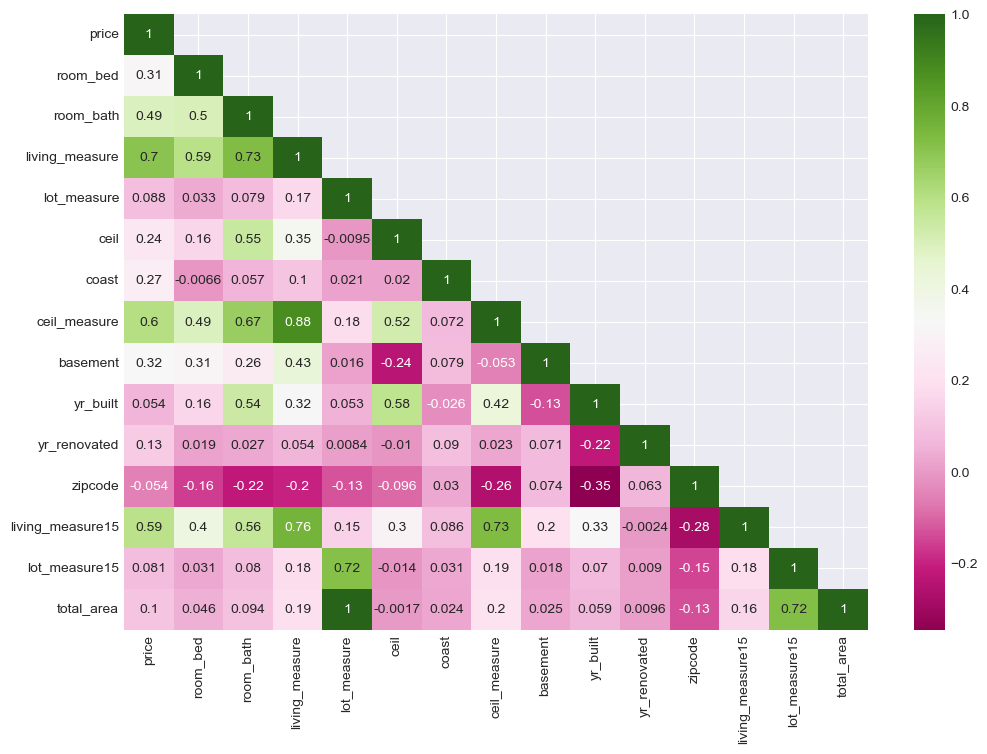

In [150]:
sns.heatmap(data=df_c1.corr(),annot=True,mask=np.triu(df_c1.corr(),1),cmap="PiYG")

In [151]:
#Lot measure shows 1 as correlation.Also living measure shows 0.88 correlation.These column will be removed before building model

In [152]:
# We will drop all rows where room bed and bath are zero

In [153]:
rows_to_drop_4 = df_c1[(df_c1['room_bed'] == 0) | (df_c1['room_bath'] == 0)].index
df_c1= df_c1.drop(rows_to_drop_4)

In [154]:
df_c1[(df_c1['room_bed'] == 0) | (df_c1['room_bath'] == 0)]

Empty DataFrame
Columns: [Sold_date, price, room_bed, room_bath, living_measure, lot_measure, ceil, coast, sight, condition, quality, ceil_measure, basement, yr_built, yr_renovated, zipcode, living_measure15, lot_measure15, furnished, total_area, location]
Index: []

In [155]:
zero_columns = df_c1.columns[df_c1.eq(0).any()]
zero_columns

Index(['coast', 'sight', 'basement', 'yr_renovated', 'furnished'], dtype='object')

In [156]:
df_c1[df_c1['room_bed']==0]

Empty DataFrame
Columns: [Sold_date, price, room_bed, room_bath, living_measure, lot_measure, ceil, coast, sight, condition, quality, ceil_measure, basement, yr_built, yr_renovated, zipcode, living_measure15, lot_measure15, furnished, total_area, location]
Index: []

In [157]:
df_c1[df_c1['room_bath']==0]

Empty DataFrame
Columns: [Sold_date, price, room_bed, room_bath, living_measure, lot_measure, ceil, coast, sight, condition, quality, ceil_measure, basement, yr_built, yr_renovated, zipcode, living_measure15, lot_measure15, furnished, total_area, location]
Index: []

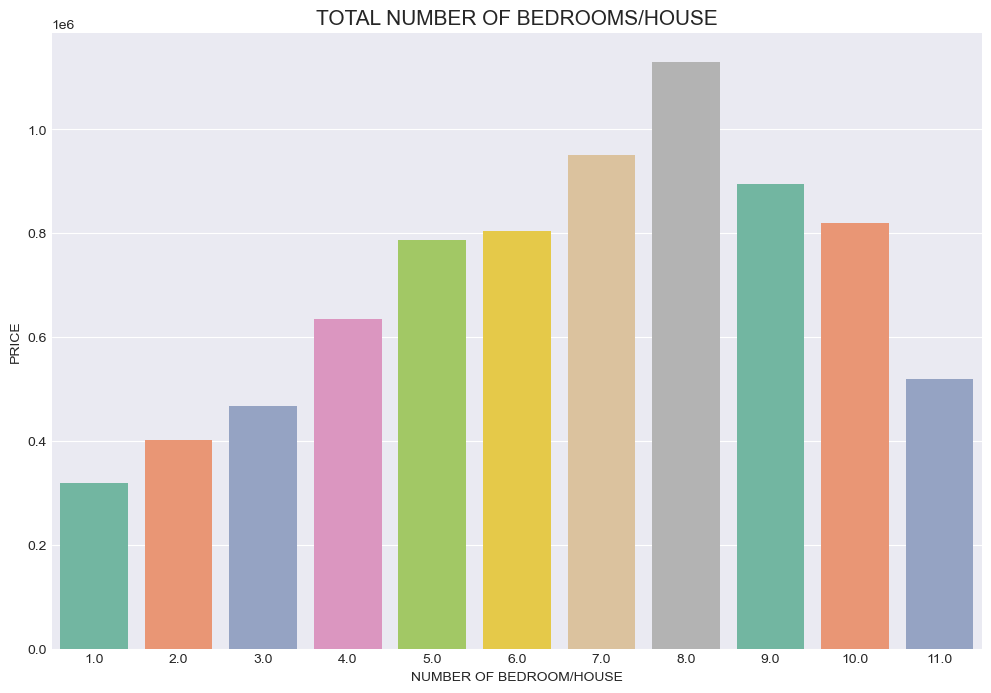

In [158]:
sns.barplot(data=df_c1, x='room_bed',y='price',errorbar=None,palette='Set2')
plt.xlabel('NUMBER OF BEDROOM/HOUSE')
plt.ylabel('PRICE')
plt.title('TOTAL NUMBER OF BEDROOMS/HOUSE')
plt.show()

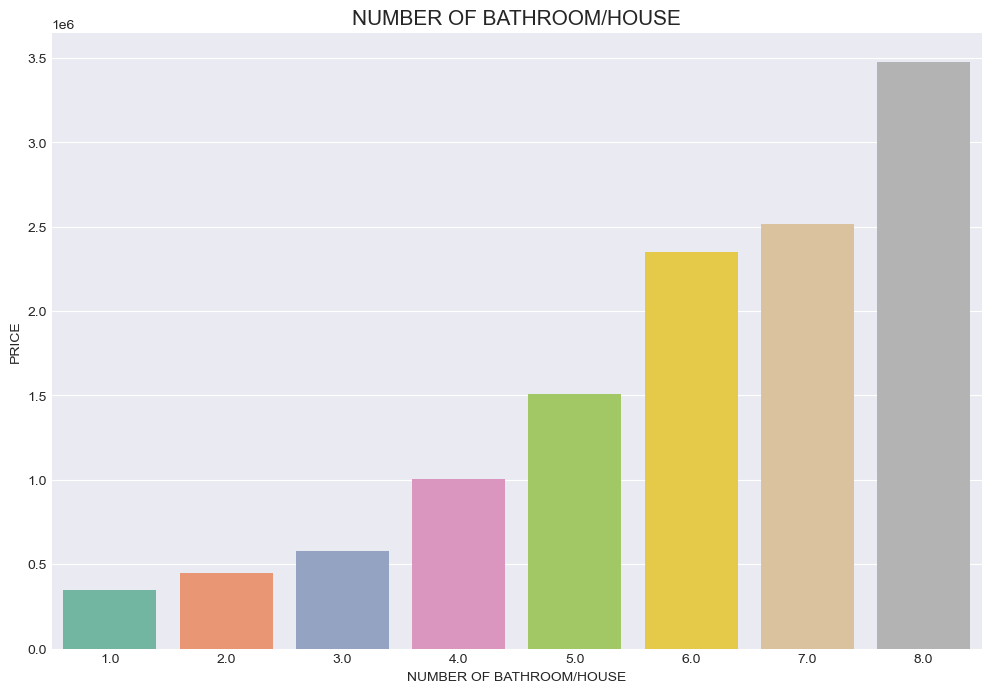

In [159]:
sns.barplot(data=df_c1, x='room_bath',y='price',errorbar=None,palette='Set2')
plt.xlabel('NUMBER OF BATHROOM/HOUSE')
plt.ylabel('PRICE')
plt.title('NUMBER OF BATHROOM/HOUSE')
plt.show()

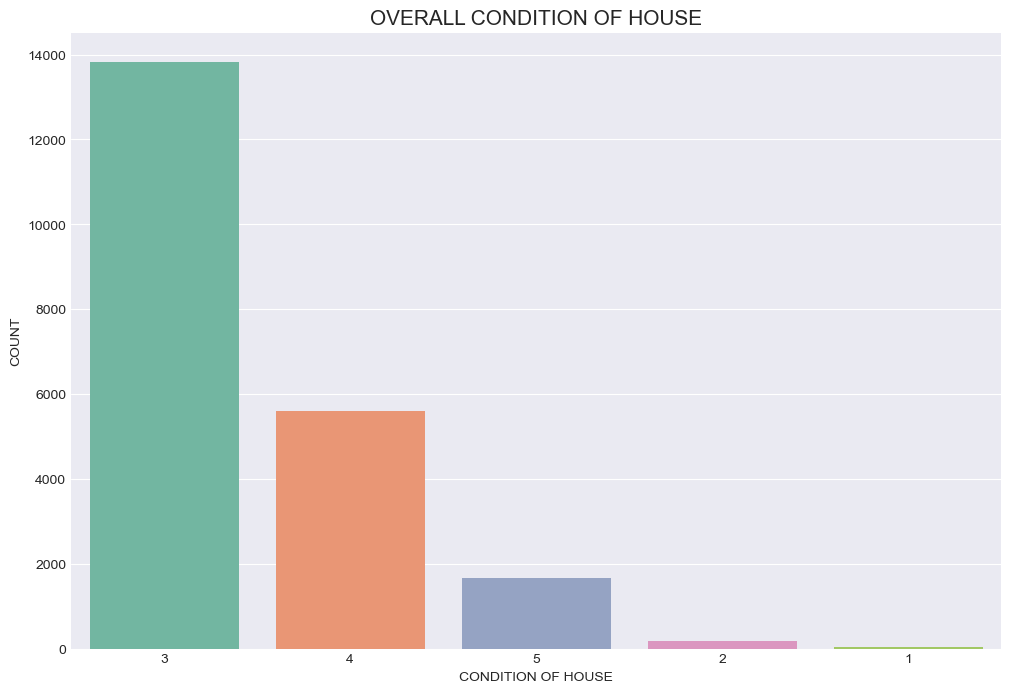

In [160]:
order = df_c1['condition'].value_counts().sort_values(ascending=False).index

sns.countplot(data=df_c1, x='condition', order=order,palette='Set2')
plt.xlabel('CONDITION OF HOUSE')
plt.ylabel('COUNT')
plt.title('OVERALL CONDITION OF HOUSE')
plt.show()

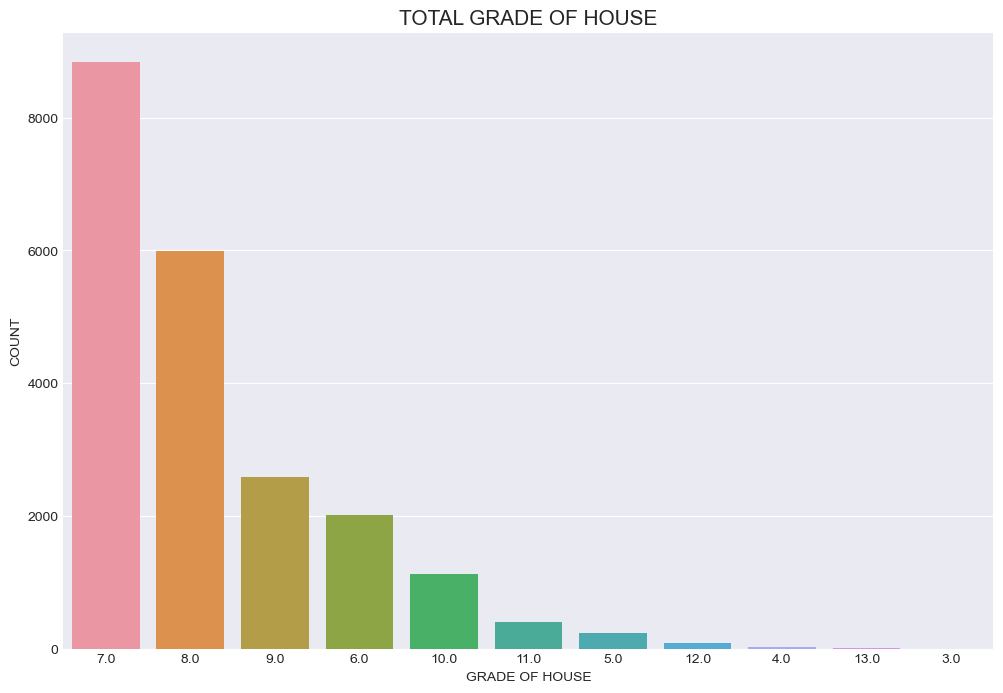

In [161]:
order = df_c1['quality'].value_counts().sort_values(ascending=False).index

sns.countplot(data=df_c1, x='quality', order=order)
plt.xlabel('GRADE OF HOUSE')
plt.ylabel('COUNT')
plt.title('TOTAL GRADE OF HOUSE')
plt.show()

In [162]:
df_c1['room_bed'].sort_values(ascending=True)

3585     1.0000
12368    1.0000
1072     1.0000
6060     1.0000
14336    1.0000
          ...  
5928     9.0000
14140   10.0000
2209    10.0000
2557    10.0000
20972   11.0000
Name: room_bed, Length: 21306, dtype: float64

In [163]:
df_c1.to_excel('House_price_data.xlsx', index=False)

In [164]:
df_c1.head()

Sold_date   price  room_bed  room_bath  living_measure  lot_measure   ceil  \
0 2015-04-27  600000    4.0000     2.0000       3050.0000    9440.0000 1.0000   
1 2015-03-17  190000    2.0000     1.0000        670.0000    3101.0000 1.0000   
2 2014-08-20  735000    4.0000     3.0000       3040.0000    2415.0000 2.0000   
3 2014-10-10  257000    3.0000     3.0000       1740.0000    3721.0000 2.0000   
4 2015-02-18  450000    2.0000     1.0000       1120.0000    4590.0000 1.0000   

   coast  sight condition quality  ceil_measure  basement  yr_built  \
0 0.0000 0.0000         3  8.0000     1800.0000 1250.0000      1966   
1 0.0000 0.0000         4  6.0000      670.0000    0.0000      1948   
2 1.0000 4.0000         3  8.0000     3040.0000    0.0000      1966   
3 0.0000 0.0000         3  8.0000     1740.0000    0.0000      2009   
4 0.0000 0.0000         3  7.0000     1120.0000    0.0000      1924   

   yr_renovated  zipcode  living_measure15  lot_measure15 furnished  \
0             0    98034         2020.0000      8660.0000    0.0000   
1             0    98118         1660.0000      4100.0000    0.0000   
2             0    98118         2620.0000      2433.0000    0.0000   
3             0    98002         2030.0000      3794.0000    0.0000   
4             0    98118         1120.0000      5100.0000    0.0000   

   total_area  location  
0       12490  Kirkland  
1        3771   Seattle  
2        5455   Seattle  
3        5461    Auburn  
4        5710   Seattle

In [165]:
df_c1['lot_measure15'].sort_values(ascending=False)

2633    871200.0000
19419   858132.0000
8221    560617.0000
21581   438213.0000
7143    434728.0000
            ...    
7909       748.0000
13931      748.0000
19296      660.0000
4890       659.0000
13308      651.0000
Name: lot_measure15, Length: 21306, dtype: float64

In [166]:
df_c1[df_c1["price"]>3413900.00]

Sold_date    price  room_bed  room_bath  living_measure  lot_measure  \
388   2014-07-01  3800000    5.0000     6.0000       7050.0000   42840.0000   
1031  2015-04-13  5350000    5.0000     5.0000       8000.0000   23985.0000   
1068  2014-10-13  7700000    6.0000     8.0000      12050.0000   27600.0000   
1069  2015-04-21  3650000    6.0000     5.0000       5480.0000   19401.0000   
1245  2014-06-17  4670000    5.0000     7.0000       9640.0000   13068.0000   
1726  2014-06-18  4490000    4.0000     3.0000       6430.0000   27517.0000   
4445  2015-04-13  5300000    6.0000     6.0000       7390.0000   24829.0000   
9646  2014-08-15  4500000    5.0000     6.0000       6640.0000   40014.0000   
10116 2015-01-07  3570000    5.0000     5.0000       4850.0000   10584.0000   
10718 2014-06-11  7060000    5.0000     5.0000      10040.0000   37325.0000   
11811 2014-10-14  4000000    4.0000     6.0000       7080.0000   16573.0000   
12045 2014-09-11  3640000    4.0000     4.0000       4830.0000   22257.0000   
12794 2014-08-04  5570000    5.0000     6.0000       9200.0000   35069.0000   
12841 2014-05-30  3710000    4.0000     4.0000       5550.0000   28078.0000   
13310 2015-05-11  3650000    5.0000     4.0000       5020.0000    8694.0000   
15281 2014-10-07  3420000    5.0000     5.0000       5450.0000   20412.0000   
15609 2014-11-18  3600000    3.0000     4.0000       5020.0000   12431.0000   
16985 2014-09-11  3800000    3.0000     5.0000       5510.0000   35000.0000   
18840 2015-05-06  4210000    5.0000     6.0000       7440.0000   21540.0000   
20038 2014-10-20  5110000    5.0000     6.0000       8010.0000   45517.0000   
20691 2014-10-11  3640000    5.0000     6.0000       5490.0000   19897.0000   
21476 2014-11-14  3850000    4.0000     5.0000       5770.0000   21300.0000   

        ceil  coast  sight condition quality  ceil_measure  basement  \
388   1.0000 0.0000 2.0000         4 13.0000     4320.0000 2730.0000   
1031  2.0000 0.0000 4.0000         3 12.0000     6720.0000 1280.0000   
1068  2.0000 0.0000 3.0000         4 13.0000     8570.0000 3480.0000   
1069  1.0000 1.0000 4.0000         5 11.0000     3910.0000 1570.0000   
1245  1.0000 1.0000 4.0000         3 12.0000     4820.0000 4820.0000   
1726  2.0000 0.0000 0.0000         3 12.0000     6430.0000    0.0000   
4445  2.0000 1.0000 4.0000         4 12.0000     5000.0000 2390.0000   
9646  2.0000 1.0000 4.0000         3 12.0000     6350.0000  290.0000   
10116 2.0000 1.0000 4.0000         3 10.0000     3540.0000 1310.0000   
10718 2.0000 1.0000 2.0000         3 11.0000     7680.0000 2360.0000   
11811 2.0000 0.0000 0.0000         3 12.0000     5760.0000 1320.0000   
12045 2.0000 1.0000 4.0000         4 11.0000     4830.0000    0.0000   
12794 2.0000 0.0000 0.0000         3 13.0000     6200.0000 3000.0000   
12841 2.0000 0.0000 2.0000         4 12.0000     3350.0000 2200.0000   
13310 2.0000 0.0000 1.0000         3 12.0000     3970.0000 1050.0000   
15281 2.0000 0.0000 0.0000         3 11.0000     5450.0000    0.0000   
15609 2.0000 1.0000 4.0000         3 10.0000     3420.0000 1600.0000   
16985 2.0000 0.0000 4.0000         3 13.0000     4910.0000  600.0000   
18840 2.0000 0.0000 0.0000         3 12.0000     5550.0000 1890.0000   
20038 2.0000 1.0000 4.0000         3 12.0000     5990.0000 2020.0000   
20691 2.0000 0.0000 0.0000         3 12.0000     5490.0000    0.0000   
21476 2.0000 1.0000 4.0000         4 11.0000     5770.0000    0.0000   

       yr_built  yr_renovated  zipcode  living_measure15  lot_measure15  \
388        1978             0    98004         5070.0000     20570.0000   
1031       2009             0    98004         4600.0000     21750.0000   
1068       1910          1987    98102         3940.0000      8800.0000   
1069       1936             0    98105         3510.0000     15810.0000   
1245       1983          2009    98040         3270.0000     10454.0000   
1726       2001             0    98004         3720.0000     14592.0000   
4445   

In [167]:
from scipy.stats import zscore

In [168]:
total_area_zscore = []

In [169]:
zscore(df_c1['total_area'])

0       -0.1127
1       -0.3225
2       -0.2820
3       -0.2819
4       -0.2759
          ...  
21608    1.1171
21609   -0.2720
21610    0.5041
21611   -0.1880
21612   -0.2493
Name: total_area, Length: 21306, dtype: float64

In [170]:
import scipy.stats as stats
def percent_outlier(_series):
    counter = 0
    lb = _series.quantile(0.25)-(1.5*(stats.iqr(_series)))
    ub = _series.quantile(0.75)+(1.5*(stats.iqr(_series)))
    for val in _series:
        if (val>ub) or (val<lb): 
            counter=counter+1
        else : pass
    return 100*counter/len(_series)

In [171]:
# As living_measure and lot_measure show high collinearity we will remove it from column.
#Also there is no use for zipcode columns now.We will remove the columns

In [172]:
df_c1.drop(['living_measure','lot_measure'],axis=1,inplace=True)

In [173]:
numeric = df_c1.select_dtypes(['int64','float64'])

In [174]:
features_list = numeric.columns

In [175]:
def outlier_percentage_df(df_c1, features_list):
    dict_outlier = {}
    for x in features_list:
        dict_outlier[x]=round(percent_outlier(df_c1[x]),4)
    return pd.DataFrame(dict_outlier, index=["% OUTLIERS"]).T.sort_values("% OUTLIERS", ascending=False)

In [176]:
outlier_percentage_df(df_c1,numeric)

% OUTLIERS
total_area           11.1471
lot_measure15        10.1380
price                 5.3694
yr_renovated          4.2007
ceil_measure          2.8302
living_measure15      2.5157
room_bed              2.4406
basement              2.2717
room_bath             1.2109
coast                 0.7510
ceil                  0.0000
yr_built              0.0000
zipcode               0.0000

In [177]:
#Let's look at the distribution of total area  at different percentiles
print("95% properties have a total_area lower than {0: .2f}".format(np.percentile(df_c1["total_area"], 95)))
print("98% properties have a total_area lower than {0: .2f}".format(np.percentile(df_c1["total_area"], 98)))
print("98.5% properties have a total_area lower than {0: .2f}".format(np.percentile(df_c1["total_area"], 98.5)))
print("99% properties have a total_area lower than {0: .2f}".format(np.percentile(df_c1["total_area"], 99)))
print("99.5% properties have a total_area lower than {0: .2f}".format(np.percentile(df_c1["total_area"], 99.5)))
print("99.7% properties have a total_area lower than {0: .2f}".format(np.percentile(df_c1["total_area"], 99.7)))
print("99.9% properties have a total_area lower than {0: .2f}".format(np.percentile(df_c1["total_area"], 99.9)))
print("100% properties have a total_area lower than {0: .2f}".format(np.percentile(df_c1["total_area"], 100)))

95% properties have a total_area lower than  45967.75
98% properties have a total_area lower than  109761.70
98.5% properties have a total_area lower than  156143.55
99% properties have a total_area lower than  214654.85
99.5% properties have a total_area lower than  249700.60
99.7% properties have a total_area lower than  321680.96
99.9% properties have a total_area lower than  500260.47
100% properties have a total_area lower than  1652659.00


In [178]:
#Let's look at the distribution of price at different percentiles
print("95% properties have a price lower than {0: .2f}".format(np.percentile(df_c1["price"], 95)))
print("98% properties have a price lower than {0: .2f}".format(np.percentile(df_c1["price"], 98)))
print("98.5% properties have a price lower than {0: .2f}".format(np.percentile(df_c1["price"], 98.5)))
print("99% properties have a price lower than {0: .2f}".format(np.percentile(df_c1["price"], 99)))
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(df_c1["price"], 99.5)))
print("99.7% properties have a price lower than {0: .2f}".format(np.percentile(df_c1["price"], 99.7)))
print("99.9% properties have a price lower than {0: .2f}".format(np.percentile(df_c1["price"], 99.9)))
print("100% properties have a price lower than {0: .2f}".format(np.percentile(df_c1["price"], 100)))

95% properties have a price lower than  1160000.00
98% properties have a price lower than  1600000.00
98.5% properties have a price lower than  1750000.00
99% properties have a price lower than  1969500.00
99.5% properties have a price lower than  2454750.00
99.7% properties have a price lower than  2880850.00
99.9% properties have a price lower than  3413900.00
100% properties have a price lower than  7700000.00


In [179]:
#Let's look at the distribution of price at different percentiles
print("95% properties have a lot_measure15 lower than {0: .2f}".format(np.percentile(df_c1["lot_measure15"], 95)))
print("98% properties have a lot_measure15 lower than {0: .2f}".format(np.percentile(df_c1["lot_measure15"], 98)))
print("98.5% properties have a lot_measure15 lower than {0: .2f}".format(np.percentile(df_c1["lot_measure15"], 98.5)))
print("99% properties have a lot_measure15 lower than {0: .2f}".format(np.percentile(df_c1["lot_measure15"], 99)))
print("99.5% properties have a lot_measure15 lower than {0: .2f}".format(np.percentile(df_c1["lot_measure15"], 99.5)))
print("99.7% properties have a lot_measure15 lower than {0: .2f}".format(np.percentile(df_c1["lot_measure15"], 99.7)))
print("99.9% properties have a lot_measure15 lower than {0: .2f}".format(np.percentile(df_c1["lot_measure15"], 99.9)))
print("100% properties have a lot_measure15 lower than {0: .2f}".format(np.percentile(df_c1["lot_measure15"], 100)))

95% properties have a lot_measure15 lower than  37040.00
98% properties have a lot_measure15 lower than  80061.40
98.5% properties have a lot_measure15 lower than  102986.30
99% properties have a lot_measure15 lower than  156750.65
99.5% properties have a lot_measure15 lower than  216057.00
99.7% properties have a lot_measure15 lower than  219542.00
99.9% properties have a lot_measure15 lower than  297978.26
100% properties have a lot_measure15 lower than  871200.00


In [180]:
# We will remove all the values higher than 99.7th percentile in price

In [181]:
# Calculate the 99.7th percentile of 'price' column
percentile_997 = df_c1['price'].quantile(0.997)

# Filter the DataFrame to keep values below the 99.7th percentile
df_c1 = df_c1[df_c1['price'] <= percentile_997]


In [182]:
# Calculate the 99.7th percentile of 'total_area' column
percentile_997_1 = df_c1['total_area'].quantile(0.997)

# Filter the DataFrame to keep values below the 99.7th percentile
df_c1 = df_c1[df_c1['total_area'] <= percentile_997_1]


In [183]:
# Calculate the 99.7th percentile of 'lot_measure15' column
percentile_99 = df_c1['lot_measure15'].quantile(0.99)

# Filter the DataFrame to keep values below the 99.7th percentile
df_c1 = df_c1[df_c1['lot_measure15'] <= percentile_99]

In [184]:
#Let's look at the distribution of price at different percentiles
print("95% properties have a price lower than {0: .2f}".format(np.percentile(df_c1["price"], 95)))
print("98% properties have a price lower than {0: .2f}".format(np.percentile(df_c1["price"], 98)))
print("98.5% properties have a price lower than {0: .2f}".format(np.percentile(df_c1["price"], 98.5)))
print("99% properties have a price lower than {0: .2f}".format(np.percentile(df_c1["price"], 99)))
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(df_c1["price"], 99.5)))
print("99.7% properties have a price lower than {0: .2f}".format(np.percentile(df_c1["price"], 99.7)))
print("99.9% properties have a price lower than {0: .2f}".format(np.percentile(df_c1["price"], 99.9)))
print("100% properties have a price lower than {0: .2f}".format(np.percentile(df_c1["price"], 100)))

95% properties have a price lower than  1130000.00
98% properties have a price lower than  1526800.00
98.5% properties have a price lower than  1650000.00
99% properties have a price lower than  1830000.00
99.5% properties have a price lower than  2191700.00
99.7% properties have a price lower than  2352040.00
99.9% properties have a price lower than  2580000.00
100% properties have a price lower than  2880000.00


In [185]:
outlier_percentage_df(df_c1,numeric)

% OUTLIERS
total_area           10.2447
lot_measure15         9.0428
price                 5.0460
yr_renovated          4.1685
ceil_measure          2.7042
room_bed              2.3895
living_measure15      2.3322
basement              2.1033
room_bath             1.0254
coast                 0.6343
ceil                  0.0000
yr_built              0.0000
zipcode               0.0000

<Axes: xlabel='lot_measure15', ylabel='Count'>

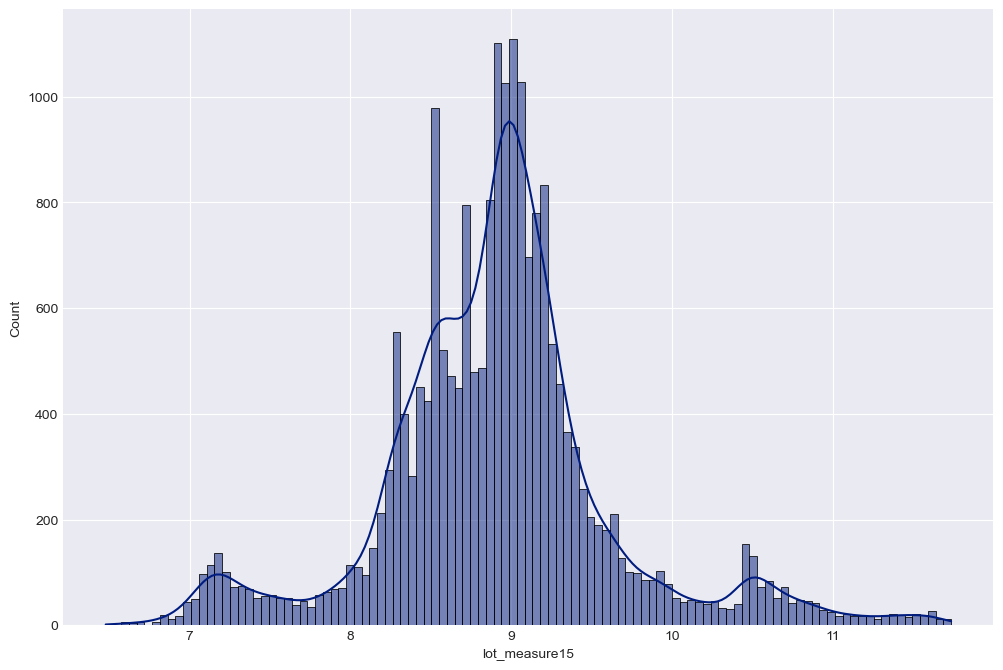

In [186]:
sns.histplot(np.log(df_c1["lot_measure15"]),kde=True)

<Axes: xlabel='price', ylabel='Count'>

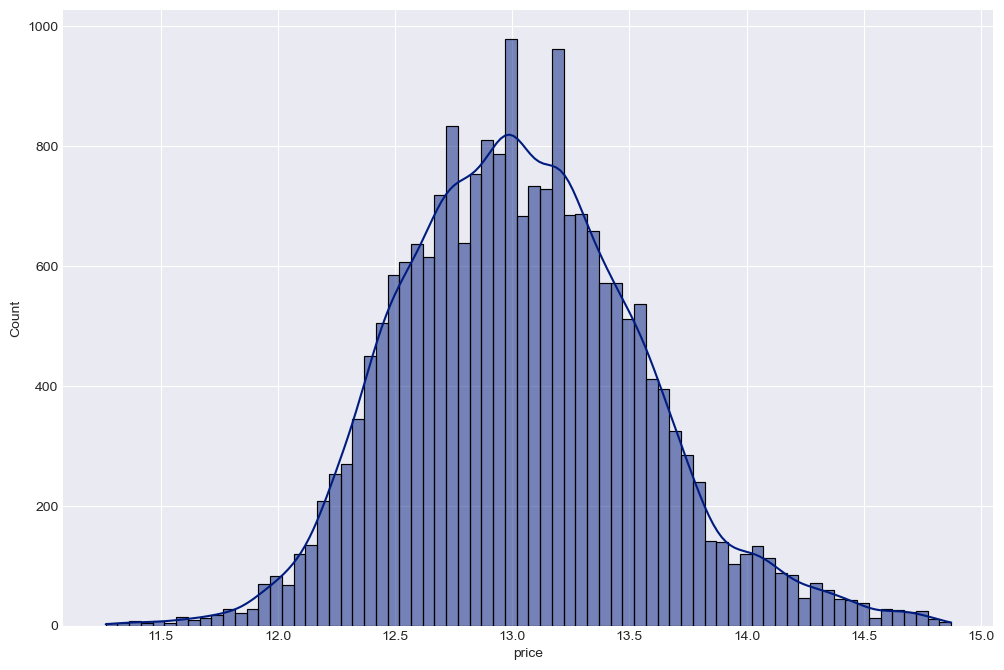

In [187]:
sns.histplot(np.log(df_c1["price"]),kde=True)

<Axes: xlabel='total_area', ylabel='Count'>

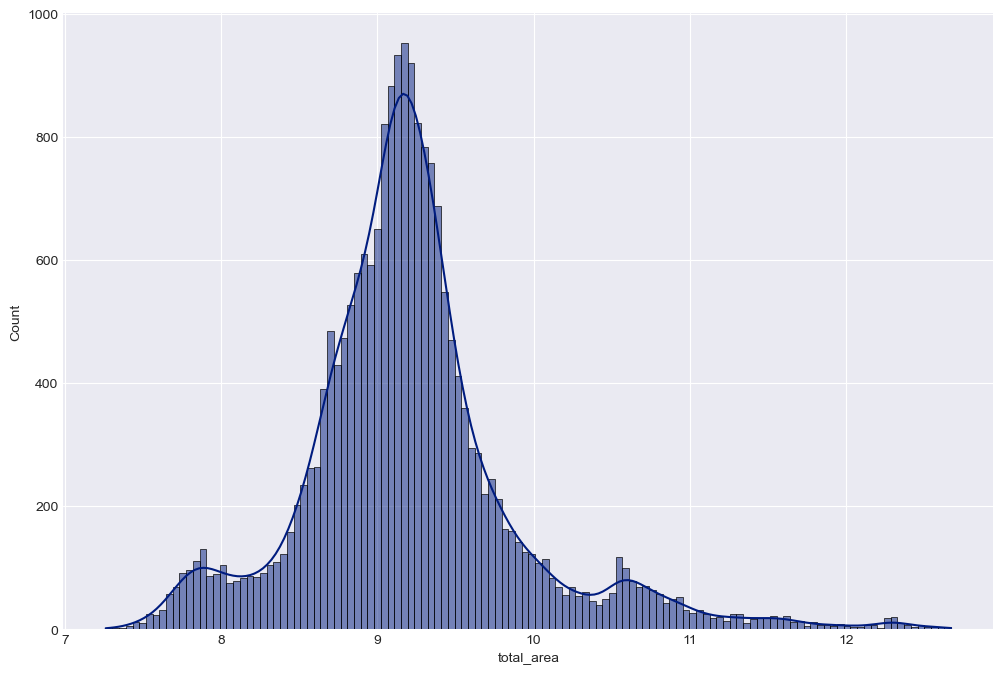

In [188]:
sns.histplot(np.log(df_c1["total_area"]),kde=True)

In [189]:
df_c1.to_excel('House_price_data.xlsx', index=False)